In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings(action='ignore')

### target

In [3]:
# 교육 서비스
a = pd.read_csv('C:/Users/KU_BD_3/mbc/인구2013.csv', encoding = 'cp949')
b = pd.read_csv('C:/Users/KU_BD_3/mbc/인구2014.csv', encoding = 'cp949')
c = pd.read_csv('C:/Users/KU_BD_3/mbc/인구2015.csv', encoding = 'cp949')
d = pd.read_csv('C:/Users/KU_BD_3/mbc/인구2016.csv', encoding = 'cp949')
e = pd.read_csv('C:/Users/KU_BD_3/mbc/인구2017.csv', encoding = 'cp949')
f = pd.read_csv('C:/Users/KU_BD_3/mbc/인구2018.csv', encoding = 'cp949')
g = pd.read_csv('C:/Users/KU_BD_3/mbc/인구2019.csv', encoding = 'cp949')

In [4]:
print(len(a))
print(len(b))
print(len(c))
print(len(d))
print(len(e))
print(len(f))
print(len(g))

6564
6588
6588
6588
6588
6588
6588


In [5]:
target = pd.concat([a,b,c,d,e,f,g]).reset_index().drop(columns = 'index')#데이터 합치기

In [6]:
target

,행정구역(시군구)별,성별,연령별,시점,총전입 (명),총전출 (명),순이동 (명)
0,세종특별자치시,계,20 - 24세,2013.01,118,131,-13
1,세종특별자치시,계,20 - 24세,2013.02,174,144,30
2,세종특별자치시,계,20 - 24세,2013.03,173,134,39
3,세종특별자치시,계,20 - 24세,2013.04,159,120,39
4,세종특별자치시,계,20 - 24세,2013.05,106,89,17
...,...,...,...,...,...,...,...
46087,합천군,계,30 - 34세,2019.08,20,17,3
46088,합천군,계,30 - 34세,2019.09,18,20,-2
46089,합천군,계,30 - 34세,2019.10,12,25,-13
46090,합천군,계,30 - 34세,2019.11,14,25,-11


In [7]:
#시나 군으로 끝나
target['시시'] = target['행정구역(시군구)별'].apply(lambda x: x[-1])

In [8]:
target = target[(target['시시'] == '시') | (target['시시'] == '군')]

In [9]:
target = target.sort_values('시점')

In [10]:
target['시점'] = target['시점'].astype('str')

In [11]:
target['년도'] = target['시점'].apply(lambda x: x[:4])
target['월'] = target['시점'].apply(lambda x: x[5:7])

In [12]:
target = target[['행정구역(시군구)별','년도','월','연령별','순이동 (명)']]

In [13]:
target['월'].value_counts()

09    3675
1     3675
11    3675
12    3675
01    3672
02    3672
03    3672
04    3672
05    3672
06    3672
07    3672
08    3672
Name: 월, dtype: int64

In [14]:
target['월'] = target['월'].replace('1','10')

In [15]:
target = target.groupby(['행정구역(시군구)별','년도','월']).sum().reset_index()

In [16]:
target['년도'].value_counts()

2014    2064
2015    2064
2016    2064
2017    2064
2018    2064
2019    2064
2013    2056
Name: 년도, dtype: int64

In [17]:
target

,행정구역(시군구)별,년도,월,순이동 (명)
0,가평군,2013,01,-40
1,가평군,2013,02,-18
2,가평군,2013,03,-56
3,가평군,2013,04,7
4,가평군,2013,05,-16
...,...,...,...,...
14435,횡성군,2019,08,-40
14436,횡성군,2019,09,-45
14437,횡성군,2019,10,-24
14438,횡성군,2019,11,7


### 고용률

In [18]:
from tqdm import tqdm

In [19]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/고용률 [2013-2021].csv', encoding = 'cp949')

In [20]:
a = a[a['성별(1)'] == '계'].reset_index().drop(columns = 'index')

In [21]:
a['행정구역별(1)'] = a['행정구역별(1)'].apply(lambda x: x[:2] + '시' if len(x) > 4 else x)


for i in tqdm(range(len(a))):
    if a['행정구역별(1)'][i][:2] == '서울':
        a['행정구역별(1)'][i] = a['행정구역별(1)'][i][:2] + '특별시'
    elif (a['행정구역별(1)'][i][:2] == '부산') | (a['행정구역별(1)'][i][:2] == '대구') | (a['행정구역별(1)'][i][:2] == '인천') | (a['행정구역별(1)'][i][:2] == '광주') | (a['행정구역별(1)'][i][:2] == '대전') | (a['행정구역별(1)'][i][:2] == '울산'):
        a['행정구역별(1)'][i] = a['행정구역별(1)'][i][:2] + '광역시'
    else:
        a['행정구역별(1)'][i] = a['행정구역별(1)'][i]

100%|███████████████████████████████████████████████████████████████████████████| 2946/2946 [00:00<00:00, 13330.45it/s]


In [22]:
a['데이터'] = a['데이터'].replace('-','0')
a['데이터'] = a['데이터'].astype('float')

In [23]:
a = a.groupby(['행정구역별(1)','시점']).mean().reset_index()

In [24]:
a['행정구역별(1)'].unique()

array(['가평군', '강릉시', '강진군', '거제시', '거창군', '경산시', '경주시', '계룡시', '고령군',
       '고성군', '고양시', '고창군', '고흥군', '곡성군', '공주시', '과천시', '광명시', '광양시',
       '광주광역시', '괴산군', '구례군', '구리시', '구미시', '군산시', '군위군', '군포시', '금산군',
       '김제시', '김천시', '김포시', '김해시', '나주시', '남양주시', '남원시', '남해군', '논산시',
       '단양군', '담양군', '당진시', '대구광역시', '대전광역시', '동두천시', '동해시', '목포시', '무안군',
       '무주군', '문경시', '밀양시', '보령시', '보성군', '보은군', '봉화군', '부산광역시', '부안군',
       '부여군', '부천시', '사천시', '산청군', '삼척시', '상주시', '서귀포시', '서산시', '서울특별시',
       '서천군', '성남시', '성주군', '속초시', '수원시', '순창군', '순천시', '시흥시', '신안군',
       '아산시', '안동시', '안산시', '안성시', '안양시', '양구군', '양산시', '양양군', '양주시',
       '양평군', '여수시', '여주군', '여주시', '연기군', '연천군', '영광군', '영덕군', '영동군',
       '영암군', '영양군', '영월군', '영주시', '영천시', '예산군', '예천군', '오산시', '옥천군',
       '완도군', '완주군', '용인시', '울릉군', '울산광역시', '울진군', '원주시', '음성군', '의령군',
       '의성군', '의왕시', '의정부시', '이천시', '익산시', '인제군', '인천광역시', '임실군', '장성군',
       '장수군', '장흥군', '전주시', '정선군', '정읍시', '제주시', '제천시', '증평군', '진도군',
  

In [25]:
a['년도'] = a['시점'].apply(lambda x: x[:4])
a['분기'] = a['시점'].apply(lambda x: x[5:8])

In [26]:
a = a.drop(columns = '시점')

In [27]:
a.columns = ['행정구역(시군구)별','고용률','년도','분기']

In [28]:
a

,행정구역(시군구)별,고용률,년도,분기
0,가평군,65.7,2013,1/2
1,가평군,65.4,2013,2/2
2,가평군,65.0,2014,1/2
3,가평군,64.3,2014,2/2
4,가평군,63.9,2015,1/2
...,...,...,...,...
2787,횡성군,68.1,2019,2/2
2788,횡성군,65.7,2020,1/2
2789,횡성군,67.0,2020,2/2
2790,횡성군,65.8,2021,1/2


In [29]:
a_list = ['01','02','03','04','05','06']
target['분기'] = 0
for i in tqdm(range(len(target))):
    if target['월'][i] in a_list:
        target['분기'][i] = '1/2'
    else:
        target['분기'][i] = '2/2'

100%|████████████████████████████████████████████████████████████████████████| 14440/14440 [00:00<00:00, 107762.49it/s]


In [30]:
target

,행정구역(시군구)별,년도,월,순이동 (명),분기
0,가평군,2013,01,-40,1/2
1,가평군,2013,02,-18,1/2
2,가평군,2013,03,-56,1/2
3,가평군,2013,04,7,1/2
4,가평군,2013,05,-16,1/2
...,...,...,...,...,...
14435,횡성군,2019,08,-40,2/2
14436,횡성군,2019,09,-45,2/2
14437,횡성군,2019,10,-24,2/2
14438,횡성군,2019,11,7,2/2


In [31]:
target = pd.merge(target, a ,on = ['행정구역(시군구)별','년도','분기'], how = 'left')

In [32]:
target = target.drop(columns = '분기')

### 도로포장률

In [33]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/도로포장률 [2013-2020].csv', encoding = 'cp949')

In [34]:
a

,행정구역별,시점,도로포장률<br>(A÷B×100) (%),포장도로<br>(A) (m),전체개통도<br>(B) (m)
0,전국,2013,91.1,87794115,96413886
1,전국,2014,91.6,89701030,97919672
2,전국,2015,92.1,91195368,99024297
3,전국,2016,92.4,92826049,100428008
4,전국,2017,92.8,94548800,101869532
...,...,...,...,...,...
1964,서귀포시,2016,97.9,804134,821620
1965,서귀포시,2017,97.9,804134,821620
1966,서귀포시,2018,97.9,804134,821620
1967,서귀포시,2019,97.9,804134,821620


In [35]:
a['행정구역별'].unique()

array(['전국', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구',
       '부산광역시', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '대구광역시', '수성구', '달서구',
       '달성군', '인천광역시', '연수구', '남동구', '부평구', '계양구', '미추홀구', '강화군', '옹진군',
       '광주광역시', '광산구', '대전광역시', '유성구', '대덕구', '울산광역시', '울주군', '세종특별자치시',
       '경기도', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시',
       '안산시', '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시',
       '하남시', '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시',
       '포천시', '여주시', '연천군', '가평군', '양평군', '강원도', '춘천시', '원주시', '강릉시',
       '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군',
       '철원군', '화천군', '양구군', '인제군', '고성군', '양양군', '충청북도', '충북 청주시', '충주시',
       '제천시', '청주시', '충북 청원군', '보은군', '옥천군', '영동군', '진천군', '괴산군', '음성군',

In [36]:
a.columns = ['행정구역(시군구)별','년도','도로포장률','포장도로길이','전체개통도길이']

In [37]:
a

,행정구역(시군구)별,년도,도로포장률,포장도로길이,전체개통도길이
0,전국,2013,91.1,87794115,96413886
1,전국,2014,91.6,89701030,97919672
2,전국,2015,92.1,91195368,99024297
3,전국,2016,92.4,92826049,100428008
4,전국,2017,92.8,94548800,101869532
...,...,...,...,...,...
1964,서귀포시,2016,97.9,804134,821620
1965,서귀포시,2017,97.9,804134,821620
1966,서귀포시,2018,97.9,804134,821620
1967,서귀포시,2019,97.9,804134,821620


In [38]:
a['년도'] = a['년도'].astype('str')
a = a[['행정구역(시군구)별','년도','포장도로길이']]

In [39]:
a['행정구역(시군구)별'].unique()

array(['전국', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구',
       '부산광역시', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '대구광역시', '수성구', '달서구',
       '달성군', '인천광역시', '연수구', '남동구', '부평구', '계양구', '미추홀구', '강화군', '옹진군',
       '광주광역시', '광산구', '대전광역시', '유성구', '대덕구', '울산광역시', '울주군', '세종특별자치시',
       '경기도', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시',
       '안산시', '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시',
       '하남시', '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시',
       '포천시', '여주시', '연천군', '가평군', '양평군', '강원도', '춘천시', '원주시', '강릉시',
       '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군',
       '철원군', '화천군', '양구군', '인제군', '고성군', '양양군', '충청북도', '충북 청주시', '충주시',
       '제천시', '청주시', '충북 청원군', '보은군', '옥천군', '영동군', '진천군', '괴산군', '음성군',

In [40]:
a

,행정구역(시군구)별,년도,포장도로길이
0,전국,2013,87794115
1,전국,2014,89701030
2,전국,2015,91195368
3,전국,2016,92826049
4,전국,2017,94548800
...,...,...,...
1964,서귀포시,2016,804134
1965,서귀포시,2017,804134
1966,서귀포시,2018,804134
1967,서귀포시,2019,804134


In [41]:
target = pd.merge(target, a ,on = ['행정구역(시군구)별','년도'], how = 'left')

In [42]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이
0,가평군,2013,01,-40,65.7,334429.0
1,가평군,2013,02,-18,65.7,334429.0
2,가평군,2013,03,-56,65.7,334429.0
3,가평군,2013,04,7,65.7,334429.0
4,가평군,2013,05,-16,65.7,334429.0
...,...,...,...,...,...,...
14519,횡성군,2019,08,-40,68.1,408816.0
14520,횡성군,2019,09,-45,68.1,408816.0
14521,횡성군,2019,10,-24,68.1,408816.0
14522,횡성군,2019,11,7,68.1,408816.0


### 교육서비스 종사자

In [43]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/교육서비스 종사자 [2004-06].csv', encoding = 'cp949')
b = pd.read_csv('C:/Users/KU_BD_3/mbc/교육서비스 종사자 [2012-16]].csv', encoding = 'cp949')
c = pd.read_csv('C:/Users/KU_BD_3/mbc/교육서비스 종사자 [2017-19].csv', encoding = 'cp949')

In [44]:
a = a[['지역별(시/군/구)','시점','총종사자수_계']]
b = b[['지역별(시/군/구)','시점','총종사자수_계 (명)']]
c = c[['지역별(시/구/군)(2)','시점','총종사자수_계 (명)']]

In [45]:
a.columns = ['행정구역(시군구)별','년도','교육서비스 종사자수']
b.columns = ['행정구역(시군구)별','년도','교육서비스 종사자수']
c.columns = ['행정구역(시군구)별','년도','교육서비스 종사자수']

In [46]:
a[a['행정구역(시군구)별'] == '창원시']

,행정구역(시군구)별,년도,교육서비스 종사자수
432,창원시,2004,6533
433,창원시,2005,7131
434,창원시,2006,7093


In [47]:
a['교육서비스 종사자수'] = a['교육서비스 종사자수'].replace('-',0).astype('float')

ㅁ = a[(a['행정구역(시군구)별'] == '진해시') | (a['행정구역(시군구)별'] == '창원시') | (a['행정구역(시군구)별'] == '마산시')]

ㅁㅁ = []
for i in ㅁ['년도'].unique():
    ㅁㅁ.append(ㅁ[ㅁ['년도'] == i].sum()['교육서비스 종사자수'])

idx = a[a['행정구역(시군구)별'] == '창원시'].index

for i in range(len(idx)):
    a.loc[idx[i],'교육서비스 종사자수'] = ㅁㅁ[i]
    
a[a['행정구역(시군구)별'] == '창원시']

,행정구역(시군구)별,년도,교육서비스 종사자수
432,창원시,2004,13193.0
433,창원시,2005,14550.0
434,창원시,2006,14518.0


In [48]:
a = pd.concat([a,b,c]).reset_index().drop(columns = 'index')

In [49]:
a['년도'] = a['년도'].astype('str')

In [50]:
a['교육서비스 종사자수'] = a['교육서비스 종사자수'].replace('-',0).astype('float')

In [51]:
year = [2007,2008,2009,2010,2011]
dd = []
ss = []
for i in a['행정구역(시군구)별'].unique():
    for x in year:
        dd.append(i)
        ss.append(x)
        
ff = pd.DataFrame({'행정구역(시군구)별': dd, '년도':ss})
ff['교육서비스 종사자수'] = np.nan

a = pd.concat([a,ff])

In [52]:
from datetime import date

In [53]:
a['년도'] = a['년도'].astype('int')

In [54]:
date(2001,1,1)

datetime.date(2001, 1, 1)

In [55]:
a['타임'] = a['년도'].apply(lambda x: date(x,1,1))

In [56]:
a = a.sort_values('타임').reset_index().drop(columns = 'index')

In [57]:
from scipy import interpolate#보간법으로 값 채우기

for i in a['행정구역(시군구)별'].unique():
    a[a['행정구역(시군구)별'] == i] = a[a['행정구역(시군구)별'] == i].interpolate()

In [58]:
a[a['년도'] == 2007]

,행정구역(시군구)별,년도,교육서비스 종사자수,타임
507,곡성군,2007,273.500000,2007-01-01
508,임실군,2007,187.500000,2007-01-01
509,순창군,2007,162.500000,2007-01-01
510,고창군,2007,482.833333,2007-01-01
511,부안군,2007,438.833333,2007-01-01
...,...,...,...,...
674,제주시,2007,5991.000000,2007-01-01
675,경상남도,2007,39500.666667,2007-01-01
676,제주도,2007,7251.000000,2007-01-01
677,창녕군,2007,676.166667,2007-01-01


In [59]:
a[a['행정구역(시군구)별'] == '창원시']

,행정구역(시군구)별,년도,교육서비스 종사자수,타임
67,창원시,2004,13193.0,2004-01-01
268,창원시,2005,14550.0,2005-01-01
341,창원시,2006,14518.0,2006-01-01
653,창원시,2007,14557.0,2007-01-01
787,창원시,2008,14596.0,2008-01-01
977,창원시,2009,14635.0,2009-01-01
1192,창원시,2010,14674.0,2010-01-01
1243,창원시,2011,14713.0,2011-01-01
1407,창원시,2012,14752.0,2012-01-01
1592,창원시,2013,15061.0,2013-01-01


In [60]:
a

,행정구역(시군구)별,년도,교육서비스 종사자수,타임
0,경기도,2004,124774.0,2004-01-01
1,홍성군,2004,1077.0,2004-01-01
2,예산군,2004,744.0,2004-01-01
3,태안군,2004,213.0,2004-01-01
4,당진군,2004,1219.0,2004-01-01
...,...,...,...,...
2672,장흥군,2019,125.0,2019-01-01
2673,옥천군,2019,328.0,2019-01-01
2674,소계,2019,9729.0,2019-01-01
2675,보성군,2019,282.0,2019-01-01


In [61]:
a['년도'] = a['년도'].astype('str')
a = a.drop(columns = '타임')

In [62]:
a

,행정구역(시군구)별,년도,교육서비스 종사자수
0,경기도,2004,124774.0
1,홍성군,2004,1077.0
2,예산군,2004,744.0
3,태안군,2004,213.0
4,당진군,2004,1219.0
...,...,...,...
2672,장흥군,2019,125.0
2673,옥천군,2019,328.0
2674,소계,2019,9729.0
2675,보성군,2019,282.0


In [63]:
target = pd.merge(target, a, on = ['행정구역(시군구)별', '년도'], how = 'left')

In [64]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수
0,가평군,2013,01,-40,65.7,334429.0,465.0
1,가평군,2013,02,-18,65.7,334429.0,465.0
2,가평군,2013,03,-56,65.7,334429.0,465.0
3,가평군,2013,04,7,65.7,334429.0,465.0
4,가평군,2013,05,-16,65.7,334429.0,465.0
...,...,...,...,...,...,...,...
14687,횡성군,2019,08,-40,68.1,408816.0,589.0
14688,횡성군,2019,09,-45,68.1,408816.0,589.0
14689,횡성군,2019,10,-24,68.1,408816.0,589.0
14690,횡성군,2019,11,7,68.1,408816.0,589.0


### 인구대비 문화기반 시설수

In [65]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/문화기반 시설수 [2003-2020].csv', encoding = 'cp949')

In [66]:
a

,행정구역별,시점,인구십만명당 문화기반시설수<br>(A÷B×100000) (개),문화기반시설수<br>(A) (개)
0,전국,2003,2.2,1083
1,전국,2004,2.4,1170
2,전국,2005,2.7,1299
3,전국,2006,2.9,1431
4,전국,2007,3.3,1619
...,...,...,...,...
4442,서귀포시,2016,36.3,62
4443,서귀포시,2017,35.3,63
4444,서귀포시,2018,38.1,69
4445,서귀포시,2019,35.8,65


In [67]:
a.columns = ['행정구역(시군구)별','년도','인구십만명당 문화기반시설수','문화기반시설수']

In [68]:
a['년도'] = a['년도'].astype(str)

In [69]:
a = a[['행정구역(시군구)별','년도','문화기반시설수']]

In [70]:
a

,행정구역(시군구)별,년도,문화기반시설수
0,전국,2003,1083
1,전국,2004,1170
2,전국,2005,1299
3,전국,2006,1431
4,전국,2007,1619
...,...,...,...
4442,서귀포시,2016,62
4443,서귀포시,2017,63
4444,서귀포시,2018,69
4445,서귀포시,2019,65


In [71]:
a['행정구역(시군구)별'].unique()

array(['전국', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구',
       '부산광역시', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '대구광역시', '수성구', '달서구',
       '달성군', '인천광역시', '연수구', '남동구', '부평구', '계양구', '미추홀구', '강화군', '옹진군',
       '광주광역시', '광산구', '대전광역시', '유성구', '대덕구', '울산광역시', '울주군', '세종특별자치시',
       '경기도', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시',
       '안산시', '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시',
       '하남시', '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시',
       '포천시', '여주시', '경기 여주군', '연천군', '가평군', '양평군', '강원도', '춘천시', '원주시',
       '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군',
       '정선군', '철원군', '화천군', '양구군', '인제군', '고성군', '양양군', '충청북도', '충북 청주시',
       '충주시', '제천시', '청주시', '충북 청원군', '보은군', '옥천군', '영동군', '진천군', '괴산

In [72]:
a[a['행정구역(시군구)별'].str.contains('광역시')]
a[a['행정구역(시군구)별'].str.contains('특별시')]
a[a['행정구역(시군구)별'].str.contains('남도')]
a[a['행정구역(시군구)별'].str.contains('북도')]
a[a['행정구역(시군구)별'].str.contains('강원도')]
a[a['행정구역(시군구)별'].str.contains('경기도')]

,행정구역(시군구)별,년도,문화기반시설수
1485,경기도,2003,158
1486,경기도,2004,174
1487,경기도,2005,219
1488,경기도,2006,248
1489,경기도,2007,275
1490,경기도,2008,308
1491,경기도,2009,349
1492,경기도,2010,360
1493,경기도,2011,378
1494,경기도,2012,406


In [73]:
b = pd.concat([a[a['행정구역(시군구)별'].str.contains('광역시')],a[a['행정구역(시군구)별'].str.contains('특별시')],a[a['행정구역(시군구)별'].str.contains('남도')],a[a['행정구역(시군구)별'].str.contains('북도')],a[a['행정구역(시군구)별'].str.contains('강원도')],a[a['행정구역(시군구)별'].str.contains('경기도')]])

In [74]:
b.to_excel('문화시설.xlsx')

In [75]:
target = pd.merge(target, a, on  = ['행정구역(시군구)별','년도'], how = 'left')

In [76]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0
...,...,...,...,...,...,...,...,...
15023,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0
15024,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0
15025,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0
15026,횡성군,2019,11,7,68.1,408816.0,589.0,6.0


### 부동산 변동률

In [77]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/부동산 변동률.csv', encoding = 'cp949')

In [78]:
a

,지역별,구분별,시점,지가변동률[%],Unnamed: 4
0,전국,주거지역,2005.01 월,.157,NaN
1,전국,주거지역,2005.02 월,.123,NaN
2,전국,주거지역,2005.03 월,.278,NaN
3,전국,주거지역,2005.04 월,.455,NaN
4,전국,주거지역,2005.05 월,.434,NaN
...,...,...,...,...,...
75249,서귀포시,주거지역,2021.11 월,.26,NaN
75250,서귀포시,주거지역,2021.12 월,.213,NaN
75251,서귀포시,주거지역,2022.01 월,.193,NaN
75252,서귀포시,주거지역,2022.02 월,.097,NaN


In [79]:
a = a[['지역별','시점','지가변동률[%]']]

In [80]:
a['년도'] = a['시점'].apply(lambda x: x[:4])
a['월'] = a['시점'].apply(lambda x: x[5:7])
a = a.drop(columns = '시점')

In [81]:
a.columns = ['행정구역(시군구)별','지가변동률(%)','년도','월']

In [82]:
a['행정구역(시군구)별'].unique()

array(['전국', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구',
       '(구)부산직할시', '(구)중구', '(구)서구', '(구)동구', '(구)영도구', '(구)부산진구',
       '(구)동래구', '(구)남구', '(구)북구', '(구)해운대구', '(구)사하구', '(구)금정구',
       '(구)강서구', '(구)대구직할시', '(구)수성구', '(구)달서구', '(구)인천직할시', '(구)남동구',
       '(구)광주직할시', '(구)광산구', '(구)대전직할시', '부산광역시', '서구', '동구', '영도구',
       '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구', '수영구',
       '사상구', '기장군', '대구광역시', '수성구', '달서구', '달성군', '인천광역시', '미추홀구', '연수구',
       '남동구', '부평구', '계양구', '강화군', '옹진군', '광주광역시', '광산구', '대전광역시', '유성구',
       '대덕구', '울산광역시', '울주군', '세종특별자치시', '경기도', '수원시', '장안구', '권선구',
       '팔달구', '영통구', '성남시', '수정구', '중원구', '분당구', '의정부시', '안양시', '만안구',
       '동안구', '부천시', '부천시 중구', '부천시 남구', '광명시', '평택시', '송탄시', '동두천시',
       '안산시', '상록구', '단원구', '고양시', '덕양구', '일산구', '일산동구', '일산서구', '과천시',
       '구리시',

In [83]:
a[a['행정구역(시군구)별'] == '창원시']

,행정구역(시군구)별,지가변동률(%),년도,월
66848,창원시,-,2005,01
66849,창원시,-,2005,02
66850,창원시,-,2005,03
66851,창원시,-,2005,04
66852,창원시,-,2005,05
...,...,...,...,...
67050,창원시,.184,2021,11
67051,창원시,.173,2021,12
67052,창원시,.183,2022,01
67053,창원시,.156,2022,02


In [84]:
a[a['행정구역(시군구)별'].str.contains('마산시')]

,행정구역(시군구)별,지가변동률(%),년도,월
68720,(구)마산시,-,2005,01
68721,(구)마산시,-,2005,02
68722,(구)마산시,-,2005,03
68723,(구)마산시,-,2005,04
68724,(구)마산시,-,2005,05
...,...,...,...,...
69219,(구)마산시,-,2015,02
69220,(구)마산시,-,2015,03
69221,(구)마산시,-,2015,04
69222,(구)마산시,-,2015,05


In [85]:
a[a['행정구역(시군구)별'].str.contains('진해시')]

,행정구역(시군구)별,지가변동률(%),년도,월
69431,진해시,.214,2005,01
69432,진해시,.151,2005,02
69433,진해시,.222,2005,03
69434,진해시,.289,2005,04
69435,진해시,.364,2005,05
...,...,...,...,...
69552,진해시,-,2015,02
69553,진해시,-,2015,03
69554,진해시,-,2015,04
69555,진해시,-,2015,05


In [86]:
a[a['행정구역(시군구)별'].str.contains('창원시')]

,행정구역(시군구)별,지가변동률(%),년도,월
66722,(구)창원시,.048,2005,01
66723,(구)창원시,.147,2005,02
66724,(구)창원시,.213,2005,03
66725,(구)창원시,.107,2005,04
66726,(구)창원시,.086,2005,05
...,...,...,...,...
67050,창원시,.184,2021,11
67051,창원시,.173,2021,12
67052,창원시,.183,2022,01
67053,창원시,.156,2022,02


In [87]:
a['지가변동률(%)'] = a['지가변동률(%)'].replace('-',0)

In [88]:
a['지가변동률(%)'] = a['지가변동률(%)'].astype('float')

In [89]:
a

,행정구역(시군구)별,지가변동률(%),년도,월
0,전국,0.157,2005,01
1,전국,0.123,2005,02
2,전국,0.278,2005,03
3,전국,0.455,2005,04
4,전국,0.434,2005,05
...,...,...,...,...
75249,서귀포시,0.260,2021,11
75250,서귀포시,0.213,2021,12
75251,서귀포시,0.193,2022,01
75252,서귀포시,0.097,2022,02


In [90]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15028 entries, 0 to 15027
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역(시군구)별  15028 non-null  object 
 1   년도          15028 non-null  object 
 2   월           15028 non-null  object 
 3   순이동 (명)     15028 non-null  int64  
 4   고용률         13312 non-null  float64
 5   포장도로길이      13336 non-null  float64
 6   교육서비스 종사자수  13300 non-null  float64
 7   문화기반시설수     13336 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.0+ MB


In [91]:
a = a[['행정구역(시군구)별','년도','월','지가변동률(%)']]

In [92]:
a

,행정구역(시군구)별,년도,월,지가변동률(%)
0,전국,2005,01,0.157
1,전국,2005,02,0.123
2,전국,2005,03,0.278
3,전국,2005,04,0.455
4,전국,2005,05,0.434
...,...,...,...,...
75249,서귀포시,2021,11,0.260
75250,서귀포시,2021,12,0.213
75251,서귀포시,2022,01,0.193
75252,서귀포시,2022,02,0.097


In [93]:
target = pd.merge(target, a, on = ['행정구역(시군구)별','년도','월'], how = 'left')

In [94]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%)
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035
...,...,...,...,...,...,...,...,...,...
15725,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219
15726,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170
15727,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175
15728,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143


### 사업체수

In [95]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/사업체수[2012-16].csv', encoding = 'cp949')
b = pd.read_csv('C:/Users/KU_BD_3/mbc/사업체수[2017-19].csv', encoding = 'cp949')

In [96]:
a.columns = ['행정구역(시군구)별','산업분류별','규모별','시점','사업체수','총종사자수','un']
b.columns = ['행정구역(시군구)별','산업분류별','규모별','시점','사업체수','총종사자수','un']

In [97]:
a = a[a['산업분류별'] == '전체']
b = b[b['산업분류별'] == '전체']

In [98]:
a = a[a['규모별'] != '전규모']
b = b[b['규모별'] != '전규모']

In [99]:
a[['사업체수','총종사자수']] = a[['사업체수','총종사자수']].replace('-','0')
b[['사업체수','총종사자수']] = b[['사업체수','총종사자수']].replace('-','0')

In [100]:
a

,행정구역(시군구)별,산업분류별,규모별,시점,사업체수,총종사자수,un
5,경기도,전체,100~199인,2012 년,1843,246702,NaN
6,경기도,전체,100~199인,2013 년,1925,260535,NaN
7,경기도,전체,100~199인,2014 년,1955,264244,NaN
8,경기도,전체,100~199인,2015 년,2115,286716,NaN
9,경기도,전체,100~199인,2016 년,2176,292393,NaN
...,...,...,...,...,...,...,...
93049,서귀포시,전체,1000인이상,2012 년,0,0,NaN
93050,서귀포시,전체,1000인이상,2013 년,0,0,NaN
93051,서귀포시,전체,1000인이상,2014 년,0,0,NaN
93052,서귀포시,전체,1000인이상,2015 년,0,0,NaN


In [101]:
a[['사업체수','총종사자수']] = a[['사업체수','총종사자수']].astype('float')
b[['사업체수','총종사자수']] = b[['사업체수','총종사자수']].astype('float')

In [102]:
a = a.groupby(['행정구역(시군구)별','시점']).sum().reset_index().drop(columns = 'un')
b = b.groupby(['행정구역(시군구)별','시점']).sum().reset_index().drop(columns = 'un')

In [103]:
c = pd.concat([a,b]).reset_index().drop(columns = 'index')

In [104]:
c['년도'] = c['시점'].apply(lambda x: x[:4])

In [105]:
c = c.drop(columns = '시점')

In [106]:
c[c['행정구역(시군구)별'] == '창원시']

,행정구역(시군구)별,사업체수,총종사자수,년도
649,창원시,312.0,97640.0,2012
650,창원시,307.0,98918.0,2013
651,창원시,321.0,98629.0,2014
652,창원시,333.0,100114.0,2015
653,창원시,350.0,105697.0,2016
1203,창원시,357.0,107796.0,2017
1204,창원시,331.0,101501.0,2018
1205,창원시,341.0,102693.0,2019


In [107]:
c = c.drop(columns = '총종사자수')

In [108]:
target = pd.merge(target, c, on = ['행정구역(시군구)별','년도'], how = 'left')

In [109]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0
...,...,...,...,...,...,...,...,...,...,...
15725,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219,19.0
15726,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170,19.0
15727,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175,19.0
15728,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143,19.0


### 사회복지시설수

In [110]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/사회복지시설수 [2003-19].csv', encoding = 'cp949')

In [111]:
a.columns = ['행정구역(시군구)별','년도','인구십만명 사회복지시설수','사회복지시설수']

In [112]:
a['년도'] = a['년도'].astype('str')

In [113]:
a['행정구역(시군구)별'] = a['행정구역(시군구)별'].apply(lambda x: '창원시' if (x == '경남 창원시') | (x == '경남 마산시') | (x == '경남 진해시') else x)

In [114]:
a['인구십만명 사회복지시설수'] = a['인구십만명 사회복지시설수'].replace('-',0)
a['사회복지시설수'] = a['사회복지시설수'].replace('-',0)

In [115]:
a['사회복지시설수'] = a['사회복지시설수'].astype('float')

In [116]:
a = a.groupby(['행정구역(시군구)별','년도']).sum().reset_index()

In [117]:
a = a[['행정구역(시군구)별','년도','사회복지시설수']]

In [118]:
a

,행정구역(시군구)별,년도,사회복지시설수
0,가평군,2003,5.0
1,가평군,2004,6.0
2,가평군,2005,10.0
3,가평군,2006,14.0
4,가평군,2007,20.0
...,...,...,...
3731,횡성군,2015,22.0
3732,횡성군,2016,24.0
3733,횡성군,2017,25.0
3734,횡성군,2018,25.0


In [119]:
b = pd.concat([a[a['행정구역(시군구)별'].str.contains('광역시')],a[a['행정구역(시군구)별'].str.contains('특별시')],a[a['행정구역(시군구)별'].str.contains('남도')],a[a['행정구역(시군구)별'].str.contains('북도')],a[a['행정구역(시군구)별'].str.contains('강원도')],a[a['행정구역(시군구)별'].str.contains('경기도')]])

In [120]:
b.to_excel('사회복지.xlsx')

In [121]:
target = pd.merge(target,a, on = ['행정구역(시군구)별','년도'], how = 'left')

In [122]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0,19.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0,19.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0,19.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0,19.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
15725,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219,19.0,26.0
15726,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170,19.0,26.0
15727,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175,19.0,26.0
15728,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143,19.0,26.0


In [123]:
a

,행정구역(시군구)별,년도,사회복지시설수
0,가평군,2003,5.0
1,가평군,2004,6.0
2,가평군,2005,10.0
3,가평군,2006,14.0
4,가평군,2007,20.0
...,...,...,...
3731,횡성군,2015,22.0
3732,횡성군,2016,24.0
3733,횡성군,2017,25.0
3734,횡성군,2018,25.0


### 재정자립도

In [124]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/재정자립도 [2001-2022].csv', encoding = 'cp949')

In [125]:
a = a.iloc[:,1:]

In [126]:
a

,행정구역별(2),시점,재정자립도(세입과목개편전)
0,소계,2001,57.6
1,소계,2002,54.8
2,소계,2003,56.3
3,소계,2004,57.2
4,소계,2005,56.2
...,...,...,...
5387,소계,2018,42.5
5388,소계,2019,36.5
5389,소계,2020,40.1
5390,소계,2021,38.7


In [127]:
a.columns = ['행정구역(시군구)별','년도','재정자립도']

In [128]:
a['년도'] = a['년도'].astype('str')

In [129]:
a['행정구역(시군구)별'].unique()

array(['소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '연수구', '남동구',
       '부평구', '계양구', '미추홀구', '강화군', '옹진군', '광산구', '유성구', '대덕구', '울주군',
       '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시',
       '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시',
       '여주시', '경기 여주군', '연천군', '가평군', '양평군', '춘천시', '원주시', '강릉시', '동해시',
       '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군',
       '화천군', '양구군', '인제군', '고성군', '양양군', '충북 청주시', '충주시', '제천시', '청주시',
       '충북 청원군', '보은군', '옥천군', '영동군', '진천군', '괴산군', '음성군', '단양군', '증평군',
       '천안시', '공주시', '보령시', '아산시', '서산시', '논산시', '계룡시', '당진시', '금산군',
       '

In [130]:
a[a['행정구역(시군구)별'] == '창원시']

,행정구역(시군구)별,년도,재정자립도
5138,창원시,2011,48.0
5139,창원시,2012,41.8
5140,창원시,2013,42.8
5141,창원시,2014,42.6
5142,창원시,2015,41.6
5143,창원시,2016,42.6
5144,창원시,2017,43.7
5145,창원시,2018,42.4
5146,창원시,2019,39.1
5147,창원시,2020,37.1


In [131]:
target = pd.merge(target, a, on = ['행정구역(시군구)별','년도'], how = 'left')

In [132]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0,19.0,27.5
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0,19.0,27.5
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0,19.0,27.5
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...
17069,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219,19.0,26.0,18.2
17070,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170,19.0,26.0,18.2
17071,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175,19.0,26.0,18.2
17072,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143,19.0,26.0,18.2


### 혼인건수

In [133]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/혼인건수 [2000-2021].csv', encoding = 'cp949')

In [134]:
a = a[['행정구역별','시점','혼인건수 (건)']]

In [135]:
a.columns = ['행정구역(시군구)별','년도','혼인건수']
a['년도'] = a['년도'].astype('str')

In [136]:
a['행정구역(시군구)별'].unique()

array(['전국', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구',
       '부산광역시', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '대구광역시', '수성구', '달서구',
       '달성군', '인천광역시', '연수구', '남동구', '부평구', '계양구', '강화군', '옹진군', '미추홀구',
       '광주광역시', '광산구', '대전광역시', '유성구', '대덕구', '울산광역시', '울주군', '세종특별자치시',
       '세종시', '경기도', '수원시', '장안구', '권선구', '팔달구', '영통구', '성남시', '수정구',
       '중원구', '분당구', '의정부시', '안양시', '만안구', '동안구', '부천시', '원미구', '소사구',
       '오정구', '광명시', '평택시', '동두천시', '안산시', '상록구', '단원구', '고양시', '덕양구',
       '일산구', '일산동구', '일산서구', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시',
       '의왕시', '하남시', '용인시', '처인구', '기흥구', '수지구', '파주시', '이천시', '안성시',
       '김포시', '화성시', '광주시', '양주시', '포천시', '여주시', '양주군', '여주군', '화성군',
       '광주군', '연천군', '포천군', '가평군', '양평군', '강원도', '춘천시', '원주시', '강릉시',
    

In [137]:
a['행정구역(시군구)별'] = a['행정구역(시군구)별'].apply(lambda x: '창원시' if x == '통합창원시' else x)

In [138]:
a['혼인건수'] = a['혼인건수'].fillna(0)

In [139]:
a['혼인건수'] = a['혼인건수'].replace('-',0)

In [140]:
a['혼인건수'] = a['혼인건수'].astype('float')

In [141]:
a = a.groupby(['행정구역(시군구)별','년도']).sum().reset_index()

In [142]:
a

,행정구역(시군구)별,년도,혼인건수
0,가평군,2000,344.0
1,가평군,2001,298.0
2,가평군,2002,312.0
3,가평군,2003,266.0
4,가평군,2004,296.0
...,...,...,...
5983,흥덕구,2017,1494.0
5984,흥덕구,2018,1424.0
5985,흥덕구,2019,1452.0
5986,흥덕구,2020,1396.0


In [143]:
target = pd.merge(target, a, on = ['행정구역(시군구)별','년도'], how = 'left')

In [144]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0,19.0,27.5,275.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0,19.0,27.5,275.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0,19.0,27.5,275.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17069,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219,19.0,26.0,18.2,184.0
17070,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170,19.0,26.0,18.2,184.0
17071,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175,19.0,26.0,18.2,184.0
17072,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143,19.0,26.0,18.2,184.0


### 병상수 구하기

In [145]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/병상.csv', encoding = 'cp949')

In [146]:
a[a['행정구역별']=='창원시' ]

,행정구역별,시점,인구 천명당 의료기관병상수<br>(A÷B×1000) (개),총병상수<br>(A) (개),주민등록인구<br>(B) (명)
1723,창원시,2013,16.9,18277,1083731
1724,창원시,2014,17.4,18760,1075168
1725,창원시,2015,17.7,18956,1070064
1726,창원시,2016,18.7,19934,1063907
1727,창원시,2017,18.6,19643,1057032
1728,창원시,2018,19.5,20508,1053601
1729,창원시,2019,18.8,19626,1044740
1730,창원시,2020,19.9,20639,1036738


In [147]:
a = a[['행정구역별','시점','총병상수<br>(A) (개)']]

In [148]:
a = a.rename(columns = {'행정구역별':'행정구역(시군구)별'})
a = a.rename(columns = {'시점':'년도'})
a = a.rename(columns = {'총병상수<br>(A) (개)':'병상수'})

In [149]:
a['년도'] = a['년도'].astype('str')

In [150]:
a['병상수'] = a['병상수'].replace('-',0)

In [151]:
a['병상수'] = a['병상수'].astype('float')

In [152]:
a

,행정구역(시군구)별,년도,병상수
0,종로구,2013,3288.0
1,종로구,2014,3476.0
2,종로구,2015,3327.0
3,종로구,2016,3295.0
4,종로구,2017,3379.0
...,...,...,...
1822,서귀포시,2016,620.0
1823,서귀포시,2017,547.0
1824,서귀포시,2018,524.0
1825,서귀포시,2019,491.0


In [153]:
target = pd.merge(target, a, on = ['행정구역(시군구)별','년도'], how = 'left')

In [154]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0,19.0,27.5,275.0,1251.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0,19.0,27.5,275.0,1251.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0,19.0,27.5,275.0,1251.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19757,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219,19.0,26.0,18.2,184.0,180.0
19758,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170,19.0,26.0,18.2,184.0,180.0
19759,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175,19.0,26.0,18.2,184.0,180.0
19760,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143,19.0,26.0,18.2,184.0,180.0


### gdp

In [155]:
a = pd.read_csv('C:/Users/KU_BD_3/mbc/grdp.csv', encoding = 'cp949')

In [156]:
a = a[['행정구역(시군구)별','년도','당해년가격']]

In [157]:
a['년도'] = a['년도'].astype('str')

In [158]:
a

,행정구역(시군구)별,년도,당해년가격
0,서울시,2010,289718721.0
1,서울시,2011,303812518.0
2,서울시,2012,313478525.0
3,서울시,2013,318607001.0
4,서울시,2014,328660905.0
...,...,...,...
2207,서귀포시,2015,4768246.0
2208,서귀포시,2016,5255821.0
2209,서귀포시,2017,5936937.0
2210,서귀포시,2018,5707401.0


In [159]:
target = pd.merge(target, a, on = ['행정구역(시군구)별','년도'], how = 'left')

In [160]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0,19.0,27.5,275.0,1251.0,1421065.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0,19.0,27.5,275.0,1251.0,1421065.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0,19.0,27.5,275.0,1251.0,1421065.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0,1421065.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0,1421065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19757,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219,19.0,26.0,18.2,184.0,180.0,NaN
19758,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170,19.0,26.0,18.2,184.0,180.0,NaN
19759,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175,19.0,26.0,18.2,184.0,180.0,NaN
19760,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143,19.0,26.0,18.2,184.0,180.0,NaN


### 문자열 숫자형으로 변경

In [161]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0,19.0,27.5,275.0,1251.0,1421065.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0,19.0,27.5,275.0,1251.0,1421065.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0,19.0,27.5,275.0,1251.0,1421065.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0,1421065.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0,1421065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19757,횡성군,2019,08,-40,68.1,408816.0,589.0,6.0,0.219,19.0,26.0,18.2,184.0,180.0,NaN
19758,횡성군,2019,09,-45,68.1,408816.0,589.0,6.0,0.170,19.0,26.0,18.2,184.0,180.0,NaN
19759,횡성군,2019,10,-24,68.1,408816.0,589.0,6.0,0.175,19.0,26.0,18.2,184.0,180.0,NaN
19760,횡성군,2019,11,7,68.1,408816.0,589.0,6.0,0.143,19.0,26.0,18.2,184.0,180.0,NaN


In [162]:
col = c.iloc[:,6:18].columns
list_str = target[col].dtypes[target[col].dtypes != 'float'].index.tolist()

In [163]:
target[list_str] = target[list_str].replace('-',0)

In [164]:
target[list_str] = target[list_str].astype('float')

In [165]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19762 entries, 0 to 19761
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역(시군구)별  19762 non-null  object 
 1   년도          19762 non-null  object 
 2   월           19762 non-null  object 
 3   순이동 (명)     19762 non-null  int64  
 4   고용률         18046 non-null  float64
 5   포장도로길이      18070 non-null  float64
 6   교육서비스 종사자수  18034 non-null  float64
 7   문화기반시설수     18070 non-null  float64
 8   지가변동률(%)    18622 non-null  float64
 9   사업체수        18034 non-null  float64
 10  사회복지시설수     18070 non-null  float64
 11  재정자립도       17970 non-null  float64
 12  혼인건수        18922 non-null  float64
 13  병상수         17986 non-null  float64
 14  당해년가격       16306 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 2.4+ MB


# 분석

In [166]:
target = target.dropna().reset_index().drop(columns = 'index')

In [167]:
col = target.iloc[:,4:].columns

In [168]:
col

Index(['고용률', '포장도로길이', '교육서비스 종사자수', '문화기반시설수', '지가변동률(%)', '사업체수', '사회복지시설수',
       '재정자립도', '혼인건수', '병상수', '당해년가격'],
      dtype='object')

## 상관관계 찍어보기

### 창원시

In [169]:
from matplotlib import pyplot as plt
import seaborn as sns
import platform
import matplotlib

In [170]:
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False    

# 20220525target 데이터 분석

In [171]:
target

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,가평군,2013,01,-40,65.7,334429.0,465.0,12.0,0.050,12.0,19.0,27.5,275.0,1251.0,1421065.0
1,가평군,2013,02,-18,65.7,334429.0,465.0,12.0,-0.061,12.0,19.0,27.5,275.0,1251.0,1421065.0
2,가평군,2013,03,-56,65.7,334429.0,465.0,12.0,0.021,12.0,19.0,27.5,275.0,1251.0,1421065.0
3,가평군,2013,04,7,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0,1421065.0
4,가평군,2013,05,-16,65.7,334429.0,465.0,12.0,0.035,12.0,19.0,27.5,275.0,1251.0,1421065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,화순군,2019,08,-67,64.5,307065.0,497.0,10.0,0.525,14.0,15.0,21.3,201.0,4298.0,1760151.0
16178,화순군,2019,09,-64,64.5,307065.0,497.0,10.0,0.417,14.0,15.0,21.3,201.0,4298.0,1760151.0
16179,화순군,2019,10,-29,64.5,307065.0,497.0,10.0,0.342,14.0,15.0,21.3,201.0,4298.0,1760151.0
16180,화순군,2019,11,-36,64.5,307065.0,497.0,10.0,0.338,14.0,15.0,21.3,201.0,4298.0,1760151.0


In [172]:
df = target[target['행정구역(시군구)별'].str.contains('시')]

In [173]:
df = df.rename(columns = {'순이동 (명)':'순이동'})

In [174]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [175]:
df

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
168,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3
169,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3
170,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3
171,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3
172,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,화성시,2019,08,1213,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16094,화성시,2019,09,1240,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16095,화성시,2019,10,1524,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16096,화성시,2019,11,1059,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0


In [176]:
dfdf = df

In [177]:
dfdf.iloc[:,4:]

,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
168,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3
169,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3
170,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3
171,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3
172,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3
...,...,...,...,...,...,...,...,...,...,...,...
16093,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16094,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16095,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16096,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0


In [178]:
dfdf.iloc[:,4:].columns

Index(['고용률', '포장도로길이', '교육서비스 종사자수', '문화기반시설수', '지가변동률(%)', '사업체수', '사회복지시설수',
       '재정자립도', '혼인건수', '병상수', '당해년가격'],
      dtype='object')

In [179]:
df9 = df.copy()

In [180]:
df9

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
168,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3
169,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3
170,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3
171,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3
172,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,화성시,2019,08,1213,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16094,화성시,2019,09,1240,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16095,화성시,2019,10,1524,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16096,화성시,2019,11,1059,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0


In [181]:
scaler = StandardScaler()

for i in dfdf.iloc[:,4:].columns:
    dfdf[i] = scaler.fit_transform(dfdf[i].values.reshape(-1,1))

In [182]:
df = df9
df

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
168,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3
169,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3
170,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3
171,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3
172,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,화성시,2019,08,1213,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16094,화성시,2019,09,1240,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16095,화성시,2019,10,1524,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16096,화성시,2019,11,1059,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0


In [183]:
dfdf

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
168,거제시,2013,01,167,1.287051,0.697579,-0.483539,-0.393751,-0.208344,1.708286,-1.022331,0.730002,0.217192,-0.609889,0.095485
169,거제시,2013,02,78,1.287051,0.697579,-0.483539,-0.393751,-0.552704,1.708286,-1.022331,0.730002,0.217192,-0.609889,0.095485
170,거제시,2013,03,240,1.287051,0.697579,-0.483539,-0.393751,-0.241669,1.708286,-1.022331,0.730002,0.217192,-0.609889,0.095485
171,거제시,2013,04,110,1.287051,0.697579,-0.483539,-0.393751,0.485931,1.708286,-1.022331,0.730002,0.217192,-0.609889,0.095485
172,거제시,2013,05,253,1.287051,0.697579,-0.483539,-0.393751,-0.852631,1.708286,-1.022331,0.730002,0.217192,-0.609889,0.095485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,화성시,2019,08,1213,1.981081,0.408136,1.742222,1.422950,0.719207,2.429440,1.711536,2.410070,1.810651,0.201628,5.507780
16094,화성시,2019,09,1240,1.981081,0.408136,1.742222,1.422950,0.513702,2.429440,1.711536,2.410070,1.810651,0.201628,5.507780
16095,화성시,2019,10,1524,1.981081,0.408136,1.742222,1.422950,1.602324,2.429440,1.711536,2.410070,1.810651,0.201628,5.507780
16096,화성시,2019,11,1059,1.981081,0.408136,1.742222,1.422950,-0.108368,2.429440,1.711536,2.410070,1.810651,0.201628,5.507780


In [184]:
df

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
168,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3
169,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3
170,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3
171,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3
172,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,화성시,2019,08,1213,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16094,화성시,2019,09,1240,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16095,화성시,2019,10,1524,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0
16096,화성시,2019,11,1059,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0


In [185]:
df_c = dfdf.groupby('행정구역(시군구)별').mean().reset_index()

In [186]:
df_c

,행정구역(시군구)별,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,거제시,18.714286,1.002003,0.028976,-0.434645,-0.247766,-1.265691,1.357703,-0.893411,0.334036,-0.024881,-0.575938,-0.088056
1,경산시,46.000000,-0.811906,0.079703,1.108193,-0.204511,0.806917,-0.031813,-0.009296,-0.384136,-0.227001,-0.100759,-0.395739
2,경주시,-102.930556,0.783398,0.726120,-0.203406,0.287512,0.123519,-0.019256,-0.602076,-0.581444,-0.376426,0.038271,-0.175491
3,계룡시,-12.833333,-1.643984,-1.511653,-0.925914,-1.302101,-0.274465,-0.985664,-1.014747,-0.847784,-1.030875,-1.123448,-0.924256
4,고양시,230.964286,-0.836348,-0.177073,1.834275,1.990669,0.198038,0.650388,3.463334,1.129005,1.901985,2.137976,0.608853
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,평택시,268.070175,0.188171,0.570837,0.172539,-0.393751,0.040767,1.103264,-0.186944,0.781862,0.672010,-0.153473,1.258835
63,포천시,-61.690476,0.111745,-0.396063,-0.502916,-0.247766,-0.623983,-0.673523,0.793927,-0.440679,-0.656175,-0.703876,-0.514154
64,포항시,-171.319444,0.041172,1.302383,0.639437,0.457828,-0.041101,0.831061,-0.239330,0.096727,0.580343,1.065577,0.510549
65,하남시,345.750000,-0.156778,-1.611026,-0.694879,-1.091234,0.835316,-0.738104,-0.578694,1.284961,-0.468432,-0.970517,-0.590511


In [187]:
df_cl = df_c.iloc[:,2:]

In [188]:
df_cl

,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,1.002003,0.028976,-0.434645,-0.247766,-1.265691,1.357703,-0.893411,0.334036,-0.024881,-0.575938,-0.088056
1,-0.811906,0.079703,1.108193,-0.204511,0.806917,-0.031813,-0.009296,-0.384136,-0.227001,-0.100759,-0.395739
2,0.783398,0.726120,-0.203406,0.287512,0.123519,-0.019256,-0.602076,-0.581444,-0.376426,0.038271,-0.175491
3,-1.643984,-1.511653,-0.925914,-1.302101,-0.274465,-0.985664,-1.014747,-0.847784,-1.030875,-1.123448,-0.924256
4,-0.836348,-0.177073,1.834275,1.990669,0.198038,0.650388,3.463334,1.129005,1.901985,2.137976,0.608853
...,...,...,...,...,...,...,...,...,...,...,...
62,0.188171,0.570837,0.172539,-0.393751,0.040767,1.103264,-0.186944,0.781862,0.672010,-0.153473,1.258835
63,0.111745,-0.396063,-0.502916,-0.247766,-0.623983,-0.673523,0.793927,-0.440679,-0.656175,-0.703876,-0.514154
64,0.041172,1.302383,0.639437,0.457828,-0.041101,0.831061,-0.239330,0.096727,0.580343,1.065577,0.510549
65,-0.156778,-1.611026,-0.694879,-1.091234,0.835316,-0.738104,-0.578694,1.284961,-0.468432,-0.970517,-0.590511


## 엘보우 기법

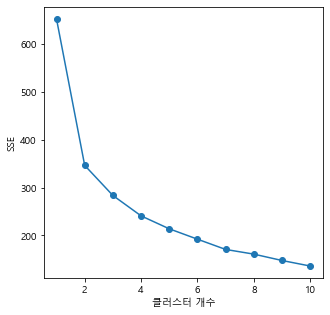

[651.7124313601985,
 346.2556561608457,
 283.51446791217825,
 240.96411518501236,
 213.9584628111756,
 192.33038301069024,
 170.90987100356668,
 161.1331904971944,
 147.87047105032647,
 136.31563848857556]

In [189]:
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.rcParams["figure.figsize"] = (5, 5)    
    plt.plot(range(1,11), sse, marker = 'o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    return sse
    
elbow(df_cl)

## 실루엣 기법

In [190]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering

def plotsil(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg)
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()

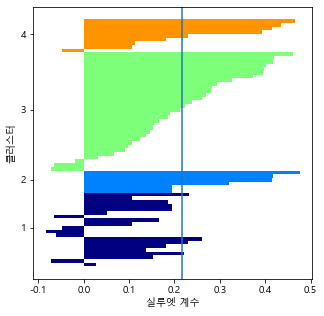

In [191]:
km = AgglomerativeClustering(n_clusters = 4)
y_km = km.fit_predict(df_cl)
plotsil(df_cl,y_km)

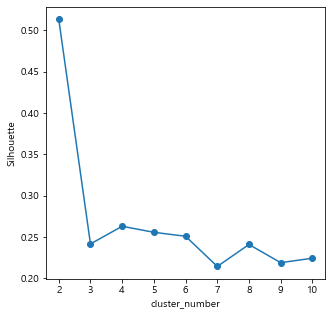

In [192]:
s_val = []
for i in range(2,11):
    km = KMeans(n_clusters = i,init = 'k-means++', random_state = 0)
    y_km = km.fit_predict(df_cl)
    s_val.append(np.mean(silhouette_samples(df_cl,y_km,metric = 'euclidean')))

plt.plot(range(2,11), s_val, marker = 'o')
plt.xlabel('cluster_number')
plt.ylabel('Silhouette')
plt.show()

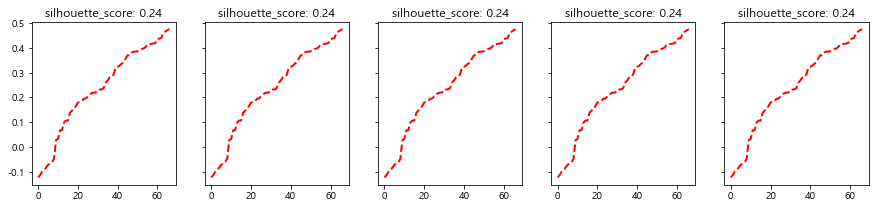

In [193]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering

f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)
for i, ax in enumerate(axes):
    cluster_nums = AgglomerativeClustering(n_clusters=3).fit_predict(df_cl)
    sil_samples = silhouette_samples(df_cl, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_cl, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("silhouette_score: {}".format(round(sil_score, 2)))
#plt.savefig('C:/Users/KU_BD_3/mbc/sil_samples_20180517_clus3.svg')
plt.show()

In [194]:
y_km = cluster_nums

In [195]:
y_km

array([1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1,
       0], dtype=int64)

In [196]:
gun = pd.DataFrame()
gun['행정구역(시군구)별'] = df_c['행정구역(시군구)별']
gun['군집'] = y_km

In [197]:
gun

,행정구역(시군구)별,군집
0,거제시,1
1,경산시,2
2,경주시,2
3,계룡시,1
4,고양시,0
...,...,...
62,평택시,1
63,포천시,2
64,포항시,0
65,하남시,1


In [198]:
df = pd.merge(df,gun, on = '행정구역(시군구)별', how = 'left')

In [199]:
up_town = df.groupby('행정구역(시군구)별')['순이동'].sum()[df.groupby('행정구역(시군구)별')['순이동'].sum() > 0].index

In [200]:
up_town

Index(['거제시', '경산시', '고양시', '구리시', '김포시', '김해시', '나주시', '남양주시', '당진시', '서산시',
       '수원시', '시흥시', '아산시', '양산시', '양주시', '오산시', '용인시', '의왕시', '의정부시', '이천시',
       '천안시', '청주시', '파주시', '평택시', '하남시', '화성시'],
      dtype='object', name='행정구역(시군구)별')

In [201]:
ut = pd.DataFrame()
for i in up_town:
    d = df[df['행정구역(시군구)별'] == i]
    ut = pd.concat([ut,d])

In [202]:
ut[ut['군집'] == 1]['행정구역(시군구)별'].unique()

array(['거제시', '구리시', '김포시', '당진시', '서산시', '시흥시', '아산시', '오산시', '의왕시',
       '이천시', '평택시', '하남시'], dtype=object)

In [203]:
ut[ut['군집'] == 2]['행정구역(시군구)별'].unique()

array(['경산시', '나주시', '양산시', '양주시', '의정부시'], dtype=object)

In [204]:
ut[ut['군집'] == 0]['행정구역(시군구)별'].unique()

array(['고양시', '김해시', '남양주시', '수원시', '용인시', '천안시', '청주시', '파주시', '화성시'],
      dtype=object)

In [205]:
df[df['군집'] == 1]['행정구역(시군구)별'].unique()

array(['거제시', '계룡시', '과천시', '광명시', '구리시', '구미시', '군포시', '김포시', '당진시',
       '동두천시', '서산시', '시흥시', '아산시', '안성시', '안양시', '오산시', '의왕시', '이천시',
       '평택시', '하남시'], dtype=object)

In [206]:
df[df['군집'] == 2]['행정구역(시군구)별'].unique()

array(['경산시', '경주시', '공주시', '광양시', '군산시', '김제시', '김천시', '나주시', '남원시',
       '논산시', '목포시', '문경시', '밀양시', '보령시', '사천시', '상주시', '순천시', '안동시',
       '양산시', '양주시', '여수시', '여주시', '영주시', '영천시', '의정부시', '익산시', '정읍시',
       '제천시', '진주시', '충주시', '통영시', '포천시'], dtype=object)

In [207]:
df[df['군집'] == 0]['행정구역(시군구)별'].unique()

array(['고양시', '김해시', '남양주시', '부천시', '성남시', '수원시', '안산시', '용인시', '전주시',
       '창원시', '천안시', '청주시', '파주시', '포항시', '화성시'], dtype=object)

### 창원시랑 같은 군집의 도시중 증가도시 분석

In [208]:
df

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
0,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
1,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
2,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
3,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
4,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5497,화성시,2019,08,1213,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5498,화성시,2019,09,1240,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5499,화성시,2019,10,1524,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5500,화성시,2019,11,1059,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0


In [209]:
ut1 = ut[ut['군집'] == 1]
ut2 = ut[ut['군집'] == 2]
ut0 = ut[ut['군집'] == 0]

In [210]:
dfut1 = pd.DataFrame()
for x in ut1['행정구역(시군구)별'].unique():   
    hwa = ut1[ut1['행정구역(시군구)별'] == x].dropna()
    X = hwa[col]
    hwa['순이동']= scaler.fit_transform(hwa['순이동'].values.reshape(-1,1))
    y = hwa['순이동']



    for i in tqdm(X.columns.drop('지가변동률(%)')):
        X[i] = scaler.fit_transform(X[i].values.reshape(-1,1))
        
        


    #기본 회귀식 돌리기
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm

    sm_model = sm.OLS(y,X)
    sm_model_fit = sm_model.fit()
    print('='*35,x,'='*35)
    print(sm_model_fit.summary())
    print(sm_model_fit.pvalues)
    qwer = pd.DataFrame()
    qwer['변수'] = sm_model_fit.pvalues.index
    qwer['p-value'] = sm_model_fit.pvalues.values
    qwer['행정구역'] = x
    dfut1 = pd.concat([dfut1,qwer])

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2511.71it/s]


=================================== 거제시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              41.95
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    7.75e-25
Time:                        16:46:51   Log-Likelihood:                         -48.236
No. Observations:                  84   AIC:                                      112.5
Df Residuals:                      76   BIC:                                      131.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1996.05it/s]


=================================== 구리시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              5.934
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    6.74e-06
Time:                        16:46:51   Log-Likelihood:                         -98.810
No. Observations:                  84   AIC:                                      213.6
Df Residuals:                      76   BIC:                                      233.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1995.20it/s]


=================================== 김포시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              11.83
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    8.70e-11
Time:                        16:46:51   Log-Likelihood:                         -85.222
No. Observations:                  84   AIC:                                      186.4
Df Residuals:                      76   BIC:                                      205.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2501.82it/s]


=================================== 당진시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.674
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              19.63
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.10e-15
Time:                        16:46:51   Log-Likelihood:                         -72.134
No. Observations:                  84   AIC:                                      160.3
Df Residuals:                      76   BIC:                                      179.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2498.84it/s]


=================================== 서산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.268
Model:                            OLS   Adj. R-squared (uncentered):              0.191
Method:                 Least Squares   F-statistic:                              3.478
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00181
Time:                        16:46:51   Log-Likelihood:                         -106.09
No. Observations:                  84   AIC:                                      228.2
Df Residuals:                      76   BIC:                                      247.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2499.88it/s]


=================================== 시흥시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                              30.72
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    7.45e-21
Time:                        16:46:51   Log-Likelihood:                         -58.582
No. Observations:                  84   AIC:                                      133.2
Df Residuals:                      76   BIC:                                      152.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1993.40it/s]


=================================== 아산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.284
Method:                 Least Squares   F-statistic:                              5.159
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    3.73e-05
Time:                        16:46:51   Log-Likelihood:                         -100.97
No. Observations:                  84   AIC:                                      217.9
Df Residuals:                      76   BIC:                                      237.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2501.22it/s]


=================================== 오산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.336
Model:                            OLS   Adj. R-squared (uncentered):              0.266
Method:                 Least Squares   F-statistic:                              4.810
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    8.21e-05
Time:                        16:46:51   Log-Likelihood:                         -101.99
No. Observations:                  84   AIC:                                      220.0
Df Residuals:                      76   BIC:                                      239.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.67it/s]


=================================== 의왕시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                              11.37
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.88e-10
Time:                        16:46:51   Log-Likelihood:                         -86.133
No. Observations:                  84   AIC:                                      188.3
Df Residuals:                      76   BIC:                                      207.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1991.98it/s]


=================================== 이천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              13.45
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    6.25e-12
Time:                        16:46:51   Log-Likelihood:                         -82.137
No. Observations:                  84   AIC:                                      180.3
Df Residuals:                      76   BIC:                                      199.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.34it/s]

=================================== 평택시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                              11.06
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    3.03e-11
Time:                        16:46:51   Log-Likelihood:                         -127.18
No. Observations:                 114   AIC:                                      270.4
Df Residuals:                     106   BIC:                                      292.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


고용률           0.324776
포장도로길이        0.817645
교육서비스 종사자수    0.210927
문화기반시설수       0.000096
지가변동률(%)      0.660488
사업체수          0.000636
사회복지시설수       0.019527
재정자립도         0.443616
혼인건수          0.488275
병상수           0.141156
당해년가격         0.004040
dtype: float64


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.24it/s]


=================================== 하남시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.650
Method:                 Least Squares   F-statistic:                              20.48
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    3.80e-16
Time:                        16:46:51   Log-Likelihood:                         -70.921
No. Observations:                  84   AIC:                                      157.8
Df Residuals:                      76   BIC:                                      177.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

In [211]:
dfut1

,변수,p-value,행정구역
0,고용률,0.004983,거제시
1,포장도로길이,0.365309,거제시
2,교육서비스 종사자수,0.030759,거제시
3,문화기반시설수,0.010874,거제시
4,지가변동률(%),0.597370,거제시
...,...,...,...
6,사회복지시설수,0.002029,하남시
7,재정자립도,0.000074,하남시
8,혼인건수,0.236736,하남시
9,병상수,0.010305,하남시


In [212]:
dfut1.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
사회복지시설수,0.167953
혼인건수,0.182227
병상수,0.199762
포장도로길이,0.226571
당해년가격,0.250829
재정자립도,0.259716
사업체수,0.274246
교육서비스 종사자수,0.285869
고용률,0.301185


In [213]:
dfut2 = pd.DataFrame()

for x in ut2['행정구역(시군구)별'].unique():   
    hwa = ut2[ut2['행정구역(시군구)별'] == x].dropna()
    X = hwa[col]
    hwa['순이동']= scaler.fit_transform(hwa['순이동'].values.reshape(-1,1))
    y = hwa['순이동']


    for i in tqdm(X.columns.drop('지가변동률(%)')):
        X[i] = scaler.fit_transform(X[i].values.reshape(-1,1))


    #기본 회귀식 돌리기
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm

    sm_model = sm.OLS(y,X)
    sm_model_fit = sm_model.fit()
    print('='*35,x,'='*35)
    print(sm_model_fit.summary())
    print(sm_model_fit.pvalues)
    qwer = pd.DataFrame()
    qwer['변수'] = sm_model_fit.pvalues.index
    qwer['p-value'] = sm_model_fit.pvalues.values
    qwer['행정구역'] = x
    dfut2 = pd.concat([dfut2,qwer])

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.43it/s]


=================================== 경산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.046
Model:                            OLS   Adj. R-squared (uncentered):             -0.057
Method:                 Least Squares   F-statistic:                             0.4489
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.867
Time:                        16:46:52   Log-Likelihood:                         -100.46
No. Observations:                  72   AIC:                                      214.9
Df Residuals:                      65   BIC:                                      230.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2499.88it/s]


=================================== 나주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.407
Model:                            OLS   Adj. R-squared (uncentered):              0.345
Method:                 Least Squares   F-statistic:                              6.534
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.86e-06
Time:                        16:46:52   Log-Likelihood:                         -97.208
No. Observations:                  84   AIC:                                      210.4
Df Residuals:                      76   BIC:                                      229.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2500.03it/s]


=================================== 양산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.458
Method:                 Least Squares   F-statistic:                              9.885
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    2.59e-09
Time:                        16:46:52   Log-Likelihood:                         -89.236
No. Observations:                  84   AIC:                                      194.5
Df Residuals:                      76   BIC:                                      213.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.91it/s]


=================================== 양주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.362
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              5.383
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    2.26e-05
Time:                        16:46:52   Log-Likelihood:                         -100.34
No. Observations:                  84   AIC:                                      216.7
Df Residuals:                      76   BIC:                                      236.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2500.48it/s]

=================================== 의정부시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.135
Model:                            OLS   Adj. R-squared (uncentered):              0.044
Method:                 Least Squares   F-statistic:                              1.480
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.179
Time:                        16:46:52   Log-Likelihood:                         -113.11
No. Observations:                  84   AIC:                                      242.2
Df Residuals:                      76   BIC:                                      261.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t

In [214]:
dfut2

,변수,p-value,행정구역
0,고용률,0.522865,경산시
1,포장도로길이,0.367055,경산시
2,교육서비스 종사자수,0.623527,경산시
3,문화기반시설수,0.353358,경산시
4,지가변동률(%),0.505351,경산시
5,사업체수,0.311817,경산시
6,사회복지시설수,0.604445,경산시
7,재정자립도,0.278058,경산시
8,혼인건수,0.880581,경산시
9,병상수,0.613339,경산시


In [215]:
dfut2.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
재정자립도,0.172851
병상수,0.222911
문화기반시설수,0.310726
포장도로길이,0.339143
혼인건수,0.342938
사회복지시설수,0.355977
교육서비스 종사자수,0.364313
사업체수,0.382181
고용률,0.622746


In [216]:
dfut0 = pd.DataFrame()
for x in ut0['행정구역(시군구)별'].unique():   
    hwa = ut0[ut0['행정구역(시군구)별'] == x].dropna()
    X = hwa[col]
    hwa['순이동']= scaler.fit_transform(hwa['순이동'].values.reshape(-1,1))
    y = hwa['순이동']


    for i in tqdm(X.columns.drop('지가변동률(%)')):
        X[i] = scaler.fit_transform(X[i].values.reshape(-1,1))


    #기본 회귀식 돌리기
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm

    sm_model = sm.OLS(y,X)
    sm_model_fit = sm_model.fit()
    print('='*35,x,'='*35)
    print(sm_model_fit.summary())
    print(sm_model_fit.pvalues)
    qwer = pd.DataFrame()
    qwer['변수'] = sm_model_fit.pvalues.index
    qwer['p-value'] = sm_model_fit.pvalues.values
    qwer['행정구역'] = x
    dfut0 = pd.concat([dfut0,qwer])

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2499.88it/s]


=================================== 고양시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.585
Method:                 Least Squares   F-statistic:                              15.81
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.82e-13
Time:                        16:46:52   Log-Likelihood:                         -78.028
No. Observations:                  84   AIC:                                      172.1
Df Residuals:                      76   BIC:                                      191.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.14it/s]

=================================== 김해시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.481
Model:                            OLS   Adj. R-squared (uncentered):              0.426
Method:                 Least Squares   F-statistic:                              8.799
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.96e-08
Time:                        16:46:52   Log-Likelihood:                         -91.658
No. Observations:                  84   AIC:                                      199.3
Df Residuals:                      76   BIC:                                      218.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.34it/s]


=================================== 남양주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              9.898
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    2.52e-09
Time:                        16:46:52   Log-Likelihood:                         -89.207
No. Observations:                  84   AIC:                                      194.4
Df Residuals:                      76   BIC:                                      213.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2501.67it/s]


=================================== 수원시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.551
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              11.65
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.17e-10
Time:                        16:46:52   Log-Likelihood:                         -85.573
No. Observations:                  84   AIC:                                      187.1
Df Residuals:                      76   BIC:                                      206.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.34it/s]


=================================== 용인시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.582
Method:                 Least Squares   F-statistic:                              15.64
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    2.34e-13
Time:                        16:46:52   Log-Likelihood:                         -78.319
No. Observations:                  84   AIC:                                      172.6
Df Residuals:                      76   BIC:                                      192.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2503.91it/s]


=================================== 천안시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.171
Model:                            OLS   Adj. R-squared (uncentered):              0.084
Method:                 Least Squares   F-statistic:                              1.957
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0635
Time:                        16:46:52   Log-Likelihood:                         -111.32
No. Observations:                  84   AIC:                                      238.6
Df Residuals:                      76   BIC:                                      258.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2003.20it/s]

=================================== 청주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.103
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              1.034
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.414
Time:                        16:46:52   Log-Likelihood:                         -81.873
No. Observations:                  60   AIC:                                      175.7
Df Residuals:                      54   BIC:                                      188.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2495.12it/s]


=================================== 파주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.243
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              3.057
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00490
Time:                        16:46:52   Log-Likelihood:                         -107.47
No. Observations:                  84   AIC:                                      230.9
Df Residuals:                      76   BIC:                                      250.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2007.80it/s]

=================================== 화성시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              37.50
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    2.28e-23
Time:                        16:46:52   Log-Likelihood:                         -52.043
No. Observations:                  84   AIC:                                      120.1
Df Residuals:                      76   BIC:                                      139.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

In [217]:
dfut0.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
혼인건수,0.171079
고용률,0.179287
당해년가격,0.185744
사업체수,0.202498
사회복지시설수,0.311620
포장도로길이,0.349178
병상수,0.359390
재정자립도,0.389826
교육서비스 종사자수,0.408304


## 감소도시

In [218]:
do_town = df.groupby('행정구역(시군구)별')['순이동'].sum()[df.groupby('행정구역(시군구)별')['순이동'].sum() <= 0].index

In [219]:
do_town

Index(['경주시', '계룡시', '공주시', '과천시', '광명시', '광양시', '구미시', '군산시', '군포시', '김제시',
       '김천시', '남원시', '논산시', '동두천시', '목포시', '문경시', '밀양시', '보령시', '부천시', '사천시',
       '상주시', '성남시', '순천시', '안동시', '안산시', '안성시', '안양시', '여수시', '여주시', '영주시',
       '영천시', '익산시', '전주시', '정읍시', '제천시', '진주시', '창원시', '충주시', '통영시', '포천시',
       '포항시'],
      dtype='object', name='행정구역(시군구)별')

In [220]:
do = pd.DataFrame()
for i in do_town:
    d = df[df['행정구역(시군구)별'] == i]
    do = pd.concat([do,d])

In [221]:
do[do['군집'] == 1]['행정구역(시군구)별'].unique()

array(['계룡시', '과천시', '광명시', '구미시', '군포시', '동두천시', '안성시', '안양시'],
      dtype=object)

In [222]:
 do[do['군집'] == 2]['행정구역(시군구)별'].unique()

array(['경주시', '공주시', '광양시', '군산시', '김제시', '김천시', '남원시', '논산시', '목포시',
       '문경시', '밀양시', '보령시', '사천시', '상주시', '순천시', '안동시', '여수시', '여주시',
       '영주시', '영천시', '익산시', '정읍시', '제천시', '진주시', '충주시', '통영시', '포천시'],
      dtype=object)

In [223]:
do[do['군집'] == 0]['행정구역(시군구)별'].unique()

array(['부천시', '성남시', '안산시', '전주시', '창원시', '포항시'], dtype=object)

In [224]:
do1 = do[do['군집'] == 1]
do2 = do[do['군집'] == 2]
do0 = do[do['군집'] == 0]

In [225]:
dfdo1 = pd.DataFrame()

for x in do1['행정구역(시군구)별'].unique():   
    hwa = do1[do1['행정구역(시군구)별'] == x].dropna()
    X = hwa[col]
    hwa['순이동']= scaler.fit_transform(hwa['순이동'].values.reshape(-1,1))
    y = hwa['순이동']



    for i in tqdm(X.columns.drop('지가변동률(%)')):
        X[i] = scaler.fit_transform(X[i].values.reshape(-1,1))


    #기본 회귀식 돌리기
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm

    sm_model = sm.OLS(y,X)
    sm_model_fit = sm_model.fit()
    print('='*35,x,'='*35)
    print(sm_model_fit.summary())
    print(sm_model_fit.pvalues)
    qwer = pd.DataFrame()
    qwer['변수'] = sm_model_fit.pvalues.index
    qwer['p-value'] = sm_model_fit.pvalues.values
    qwer['행정구역'] = x
    dfdo1 = pd.concat([dfdo1,qwer])

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.29it/s]


=================================== 계룡시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              5.154
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    3.77e-05
Time:                        16:46:52   Log-Likelihood:                         -100.99
No. Observations:                  84   AIC:                                      218.0
Df Residuals:                      76   BIC:                                      237.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2500.33it/s]


=================================== 과천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.559
Method:                 Least Squares   F-statistic:                              14.33
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.62e-12
Time:                        16:46:52   Log-Likelihood:                         -80.560
No. Observations:                  84   AIC:                                      177.1
Df Residuals:                      76   BIC:                                      196.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.10it/s]


=================================== 광명시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.271
Model:                            OLS   Adj. R-squared (uncentered):              0.194
Method:                 Least Squares   F-statistic:                              3.531
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00160
Time:                        16:46:52   Log-Likelihood:                         -105.92
No. Observations:                  84   AIC:                                      227.8
Df Residuals:                      76   BIC:                                      247.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1992.83it/s]


=================================== 구미시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.235
Model:                            OLS   Adj. R-squared (uncentered):              0.153
Method:                 Least Squares   F-statistic:                              2.858
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0116
Time:                        16:46:52   Log-Likelihood:                         -92.503
No. Observations:                  72   AIC:                                      199.0
Df Residuals:                      65   BIC:                                      214.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2505.11it/s]


=================================== 군포시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.405
Model:                            OLS   Adj. R-squared (uncentered):              0.343
Method:                 Least Squares   F-statistic:                              6.474
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    2.11e-06
Time:                        16:46:52   Log-Likelihood:                         -97.365
No. Observations:                  84   AIC:                                      210.7
Df Residuals:                      76   BIC:                                      230.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1672.84it/s]


=================================== 동두천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.253
Model:                            OLS   Adj. R-squared (uncentered):              0.174
Method:                 Least Squares   F-statistic:                              3.218
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00334
Time:                        16:46:52   Log-Likelihood:                         -106.94
No. Observations:                  84   AIC:                                      229.9
Df Residuals:                      76   BIC:                                      249.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2515.48it/s]


=================================== 안성시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.294
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              3.955
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    0.000589
Time:                        16:46:52   Log-Likelihood:                         -104.57
No. Observations:                  84   AIC:                                      225.1
Df Residuals:                      76   BIC:                                      244.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1988.48it/s]

=================================== 안양시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              5.139
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    3.90e-05
Time:                        16:46:52   Log-Likelihood:                         -101.03
No. Observations:                  84   AIC:                                      218.1
Df Residuals:                      76   BIC:                                      237.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

In [226]:
dfdo1

,변수,p-value,행정구역
0,고용률,0.000044,계룡시
1,포장도로길이,0.000048,계룡시
2,교육서비스 종사자수,0.000340,계룡시
3,문화기반시설수,0.000438,계룡시
4,지가변동률(%),0.688341,계룡시
...,...,...,...
6,사회복지시설수,0.359670,안양시
7,재정자립도,0.607605,안양시
8,혼인건수,0.064163,안양시
9,병상수,0.007870,안양시


In [227]:
dfdo1.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
혼인건수,0.054604
교육서비스 종사자수,0.106502
고용률,0.126976
문화기반시설수,0.153140
포장도로길이,0.274925
병상수,0.306366
사회복지시설수,0.314682
사업체수,0.351227
당해년가격,0.353050


In [228]:
dfdo2 = pd.DataFrame()
for x in do2['행정구역(시군구)별'].unique():   
    hwa = do2[do2['행정구역(시군구)별'] == x].dropna()
    X = hwa[col]
    hwa['순이동']= scaler.fit_transform(hwa['순이동'].values.reshape(-1,1))
    y = hwa['순이동']


    for i in tqdm(X.columns.drop('지가변동률(%)')):
        X[i] = scaler.fit_transform(X[i].values.reshape(-1,1))


    #기본 회귀식 돌리기
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm

    sm_model = sm.OLS(y,X)
    sm_model_fit = sm_model.fit()
    print('='*35,x,'='*35)
    print(sm_model_fit.summary())
    print(sm_model_fit.pvalues)
    qwer = pd.DataFrame()
    qwer['변수'] = sm_model_fit.pvalues.index
    qwer['p-value'] = sm_model_fit.pvalues.values
    qwer['행정구역'] = x
    dfdo2 = pd.concat([dfdo2,qwer])

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1990.37it/s]


=================================== 경주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.128
Model:                            OLS   Adj. R-squared (uncentered):              0.034
Method:                 Least Squares   F-statistic:                              1.361
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.237
Time:                        16:46:52   Log-Likelihood:                         -97.240
No. Observations:                  72   AIC:                                      208.5
Df Residuals:                      65   BIC:                                      224.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.81it/s]


=================================== 공주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.170
Model:                            OLS   Adj. R-squared (uncentered):              0.083
Method:                 Least Squares   F-statistic:                              1.952
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0643
Time:                        16:46:52   Log-Likelihood:                         -111.34
No. Observations:                  84   AIC:                                      238.7
Df Residuals:                      76   BIC:                                      258.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.29it/s]


=================================== 광양시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.068
Method:                 Least Squares   F-statistic:                             0.3298
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.952
Time:                        16:46:52   Log-Likelihood:                         -117.76
No. Observations:                  84   AIC:                                      251.5
Df Residuals:                      76   BIC:                                      271.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1000.10it/s]


=================================== 군산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.324
Model:                            OLS   Adj. R-squared (uncentered):              0.253
Method:                 Least Squares   F-statistic:                              4.558
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    0.000146
Time:                        16:46:52   Log-Likelihood:                         -102.73
No. Observations:                  84   AIC:                                      221.5
Df Residuals:                      76   BIC:                                      240.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2475.68it/s]

=================================== 김제시 ===================================


                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):             -0.026
Method:                 Least Squares   F-statistic:                             0.7378
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.658
Time:                        16:46:52   Log-Likelihood:                         -116.05
No. Observations:                  84   AIC:                                      248.1
Df Residuals:                      76   BIC:                                      267.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.38it/s]


=================================== 김천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.210
Model:                            OLS   Adj. R-squared (uncentered):              0.124
Method:                 Least Squares   F-statistic:                              2.461
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0265
Time:                        16:46:52   Log-Likelihood:                         -93.700
No. Observations:                  72   AIC:                                      201.4
Df Residuals:                      65   BIC:                                      217.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2008.96it/s]

=================================== 남원시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.151
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              1.692
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.114
Time:                        16:46:52   Log-Likelihood:                         -112.31
No. Observations:                  84   AIC:                                      240.6
Df Residuals:                      76   BIC:                                      260.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.24it/s]


=================================== 논산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.068
Model:                            OLS   Adj. R-squared (uncentered):             -0.030
Method:                 Least Squares   F-statistic:                             0.6898
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.699
Time:                        16:46:52   Log-Likelihood:                         -116.25
No. Observations:                  84   AIC:                                      248.5
Df Residuals:                      76   BIC:                                      267.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2485.07it/s]


=================================== 목포시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.305
Model:                            OLS   Adj. R-squared (uncentered):              0.232
Method:                 Least Squares   F-statistic:                              4.167
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    0.000360
Time:                        16:46:52   Log-Likelihood:                         -103.92
No. Observations:                  84   AIC:                                      223.8
Df Residuals:                      76   BIC:                                      243.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2017.27it/s]


=================================== 문경시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.241
Model:                            OLS   Adj. R-squared (uncentered):              0.160
Method:                 Least Squares   F-statistic:                              2.956
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00942
Time:                        16:46:52   Log-Likelihood:                         -92.213
No. Observations:                  72   AIC:                                      198.4
Df Residuals:                      65   BIC:                                      214.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1992.16it/s]


=================================== 밀양시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              1.807
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0887
Time:                        16:46:52   Log-Likelihood:                         -111.88
No. Observations:                  84   AIC:                                      239.8
Df Residuals:                      76   BIC:                                      259.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2012.91it/s]


=================================== 보령시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.212
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                              2.556
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0159
Time:                        16:46:52   Log-Likelihood:                         -109.18
No. Observations:                  84   AIC:                                      234.4
Df Residuals:                      76   BIC:                                      253.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1989.05it/s]


=================================== 사천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.281
Model:                            OLS   Adj. R-squared (uncentered):              0.205
Method:                 Least Squares   F-statistic:                              3.708
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00105
Time:                        16:46:52   Log-Likelihood:                         -105.35
No. Observations:                  84   AIC:                                      226.7
Df Residuals:                      76   BIC:                                      246.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2496.46it/s]


=================================== 상주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.151
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              1.652
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.137
Time:                        16:46:52   Log-Likelihood:                         -96.269
No. Observations:                  72   AIC:                                      206.5
Df Residuals:                      65   BIC:                                      222.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2501.08it/s]


=================================== 순천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):             -0.075
Method:                 Least Squares   F-statistic:                             0.2669
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.975
Time:                        16:46:52   Log-Likelihood:                         -118.03
No. Observations:                  84   AIC:                                      252.1
Df Residuals:                      76   BIC:                                      271.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2496.31it/s]


=================================== 안동시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                             0.5434
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.798
Time:                        16:46:53   Log-Likelihood:                         -100.12
No. Observations:                  72   AIC:                                      214.2
Df Residuals:                      65   BIC:                                      230.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1252.33it/s]


=================================== 여수시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.087
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                             0.9008
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.520
Time:                        16:46:53   Log-Likelihood:                         -115.39
No. Observations:                  84   AIC:                                      246.8
Df Residuals:                      76   BIC:                                      266.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.00it/s]


=================================== 여주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.264
Model:                            OLS   Adj. R-squared (uncentered):              0.184
Method:                 Least Squares   F-statistic:                              3.322
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00438
Time:                        16:46:53   Log-Likelihood:                         -91.153
No. Observations:                  72   AIC:                                      196.3
Df Residuals:                      65   BIC:                                      212.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2499.88it/s]


=================================== 영주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.359
Model:                            OLS   Adj. R-squared (uncentered):              0.289
Method:                 Least Squares   F-statistic:                              5.190
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    9.83e-05
Time:                        16:46:53   Log-Likelihood:                         -86.179
No. Observations:                  72   AIC:                                      186.4
Df Residuals:                      65   BIC:                                      202.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1998.14it/s]


=================================== 영천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.149
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              1.624
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.144
Time:                        16:46:53   Log-Likelihood:                         -96.360
No. Observations:                  72   AIC:                                      206.7
Df Residuals:                      65   BIC:                                      222.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1668.84it/s]

=================================== 익산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.604
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              14.52
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    1.22e-12
Time:                        16:46:53   Log-Likelihood:                         -80.237
No. Observations:                  84   AIC:                                      176.5
Df Residuals:                      76   BIC:                                      195.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.00it/s]


=================================== 정읍시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.099
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              1.042
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.413
Time:                        16:46:53   Log-Likelihood:                         -114.82
No. Observations:                  84   AIC:                                      245.6
Df Residuals:                      76   BIC:                                      265.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2013.49it/s]


=================================== 제천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):             -0.034
Method:                 Least Squares   F-statistic:                             0.6535
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.730
Time:                        16:46:53   Log-Likelihood:                         -116.40
No. Observations:                  84   AIC:                                      248.8
Df Residuals:                      76   BIC:                                      268.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1998.05it/s]


=================================== 진주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.274
Model:                            OLS   Adj. R-squared (uncentered):              0.198
Method:                 Least Squares   F-statistic:                              3.589
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00139
Time:                        16:46:53   Log-Likelihood:                         -105.73
No. Observations:                  84   AIC:                                      227.5
Df Residuals:                      76   BIC:                                      246.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2512.31it/s]

=================================== 충주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              5.913
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    7.04e-06
Time:                        16:46:53   Log-Likelihood:                         -98.866
No. Observations:                  84   AIC:                                      213.7
Df Residuals:                      76   BIC:                                      233.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


고용률           0.028503
포장도로길이        0.000958
교육서비스 종사자수    0.033867
문화기반시설수       0.020723
지가변동률(%)      0.811745
사업체수          0.000029
사회복지시설수       0.000005
재정자립도         0.001784
혼인건수          0.000254
병상수           0.009427
당해년가격         0.000002
dtype: float64


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2494.83it/s]


=================================== 통영시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.238
Model:                            OLS   Adj. R-squared (uncentered):              0.158
Method:                 Least Squares   F-statistic:                              2.968
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00604
Time:                        16:46:53   Log-Likelihood:                         -107.77
No. Observations:                  84   AIC:                                      231.5
Df Residuals:                      76   BIC:                                      251.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.05it/s]

=================================== 포천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.092
Method:                 Least Squares   F-statistic:                              2.060
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0503
Time:                        16:46:53   Log-Likelihood:                         -110.95
No. Observations:                  84   AIC:                                      237.9
Df Residuals:                      76   BIC:                                      257.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

In [229]:
dfdo2

,변수,p-value,행정구역
0,고용률,0.018001,경주시
1,포장도로길이,0.226531,경주시
2,교육서비스 종사자수,0.121217,경주시
3,문화기반시설수,0.226781,경주시
4,지가변동률(%),0.689009,경주시
...,...,...,...
6,사회복지시설수,0.695934,포천시
7,재정자립도,0.705117,포천시
8,혼인건수,0.706865,포천시
9,병상수,0.192671,포천시


In [230]:
dfdo2.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
사업체수,0.326213
교육서비스 종사자수,0.403800
당해년가격,0.431356
고용률,0.438219
재정자립도,0.443549
혼인건수,0.445618
병상수,0.478017
포장도로길이,0.479482
문화기반시설수,0.499744


In [231]:
do0['행정구역(시군구)별'].unique()

array(['부천시', '성남시', '안산시', '전주시', '창원시', '포항시'], dtype=object)

In [232]:
dfdo0 = pd.DataFrame()
for x in do0['행정구역(시군구)별'].unique():   
    hwa = do0[do0['행정구역(시군구)별'] == x].dropna()
    X = hwa[col]
    hwa['순이동']= scaler.fit_transform(hwa['순이동'].values.reshape(-1,1))
    y = hwa['순이동']



    for i in tqdm(X.columns.drop('지가변동률(%)')):
        X[i] = scaler.fit_transform(X[i].values.reshape(-1,1))


    #기본 회귀식 돌리기
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm

    sm_model = sm.OLS(y,X)
    sm_model_fit = sm_model.fit()
    print('='*35,x,'='*35)
    print(sm_model_fit.summary())
    print(sm_model_fit.pvalues)
    qwer = pd.DataFrame()
    qwer['변수'] = sm_model_fit.pvalues.index
    qwer['p-value'] = sm_model_fit.pvalues.values
    qwer['행정구역'] = x
    dfdo0 = pd.concat([dfdo0,qwer])

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2003.11it/s]


=================================== 부천시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.308
Model:                            OLS   Adj. R-squared (uncentered):              0.235
Method:                 Least Squares   F-statistic:                              4.228
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    0.000312
Time:                        16:46:53   Log-Likelihood:                         -103.73
No. Observations:                  84   AIC:                                      223.5
Df Residuals:                      76   BIC:                                      242.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2001.48it/s]


=================================== 성남시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.195
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              2.307
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                      0.0285
Time:                        16:46:53   Log-Likelihood:                         -110.06
No. Observations:                  84   AIC:                                      236.1
Df Residuals:                      76   BIC:                                      255.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2493.79it/s]

=================================== 안산시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.401
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              6.365
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    2.66e-06
Time:                        16:46:53   Log-Likelihood:                         -97.652
No. Observations:                  84   AIC:                                      211.3
Df Residuals:                      76   BIC:                                      230.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2010.89it/s]


=================================== 전주시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.074
Model:                            OLS   Adj. R-squared (uncentered):             -0.023
Method:                 Least Squares   F-statistic:                             0.7605
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.638
Time:                        16:46:53   Log-Likelihood:                         -115.96
No. Observations:                  84   AIC:                                      247.9
Df Residuals:                      76   BIC:                                      267.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1998.24it/s]

=================================== 창원시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.244
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              3.058
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                     0.00488
Time:                        16:46:53   Log-Likelihood:                         -107.47
No. Observations:                  84   AIC:                                      230.9
Df Residuals:                      76   BIC:                                      250.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2492.75it/s]

=================================== 포항시 ===================================
                                 OLS Regression Results                                
Dep. Variable:                    순이동   R-squared (uncentered):                   0.135
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              1.452
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.200
Time:                        16:46:53   Log-Likelihood:                         -96.932
No. Observations:                  72   AIC:                                      207.9
Df Residuals:                      65   BIC:                                      223.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

In [233]:
dfdo0

,변수,p-value,행정구역
0,고용률,0.768816,부천시
1,포장도로길이,0.119145,부천시
2,교육서비스 종사자수,0.037376,부천시
3,문화기반시설수,0.046814,부천시
4,지가변동률(%),0.874331,부천시
...,...,...,...
6,사회복지시설수,0.821414,포항시
7,재정자립도,0.516815,포항시
8,혼인건수,0.167234,포항시
9,병상수,0.737535,포항시


In [234]:
dfdo0.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
포장도로길이,0.186641
교육서비스 종사자수,0.210670
혼인건수,0.316184
고용률,0.358640
사회복지시설수,0.386776
사업체수,0.405829
병상수,0.437077
문화기반시설수,0.461997
재정자립도,0.524877


### 창원시 상관계수 뽑아보기

In [235]:
df_cw = df[df['행정구역(시군구)별'] == '창원시']

In [236]:
df_cw

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
4584,창원시,2013,01,-114,57.2,1533082.0,15061.0,33.0,-0.071,307.0,74.0,42.8,6897.0,18277.0,36015396.8,0
4585,창원시,2013,02,-345,57.2,1533082.0,15061.0,33.0,0.245,307.0,74.0,42.8,6897.0,18277.0,36015396.8,0
4586,창원시,2013,03,-504,57.2,1533082.0,15061.0,33.0,0.222,307.0,74.0,42.8,6897.0,18277.0,36015396.8,0
4587,창원시,2013,04,-288,57.2,1533082.0,15061.0,33.0,0.330,307.0,74.0,42.8,6897.0,18277.0,36015396.8,0
4588,창원시,2013,05,-427,57.2,1533082.0,15061.0,33.0,0.259,307.0,74.0,42.8,6897.0,18277.0,36015396.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,창원시,2019,08,-460,60.0,1721897.0,16434.0,39.0,-0.180,341.0,107.0,39.1,4444.0,19626.0,39860038.0,0
4664,창원시,2019,09,-509,60.0,1721897.0,16434.0,39.0,-0.230,341.0,107.0,39.1,4444.0,19626.0,39860038.0,0
4665,창원시,2019,10,-318,60.0,1721897.0,16434.0,39.0,-0.217,341.0,107.0,39.1,4444.0,19626.0,39860038.0,0
4666,창원시,2019,11,-407,60.0,1721897.0,16434.0,39.0,-0.214,341.0,107.0,39.1,4444.0,19626.0,39860038.0,0


In [237]:
dfut1['변수'].unique()

array(['고용률', '포장도로길이', '교육서비스 종사자수', '문화기반시설수', '지가변동률(%)', '사업체수',
       '사회복지시설수', '재정자립도', '혼인건수', '병상수', '당해년가격'], dtype=object)

In [238]:
dfut1.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
사회복지시설수,0.167953
혼인건수,0.182227
병상수,0.199762
포장도로길이,0.226571
당해년가격,0.250829
재정자립도,0.259716
사업체수,0.274246
교육서비스 종사자수,0.285869
고용률,0.301185


In [239]:
dfdo1.groupby('변수').mean().sort_values('p-value')

,p-value
변수,
혼인건수,0.054604
교육서비스 종사자수,0.106502
고용률,0.126976
문화기반시설수,0.153140
포장도로길이,0.274925
병상수,0.306366
사회복지시설수,0.314682
사업체수,0.351227
당해년가격,0.353050


In [240]:
ut1

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
0,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
1,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
2,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
3,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
4,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,하남시,2019,08,636,61.8,94220.0,2483.0,7.0,0.509,37.0,23.0,56.2,1309.0,1267.0,6919187.0,1
5414,하남시,2019,09,454,61.8,94220.0,2483.0,7.0,0.539,37.0,23.0,56.2,1309.0,1267.0,6919187.0,1
5415,하남시,2019,10,365,61.8,94220.0,2483.0,7.0,0.635,37.0,23.0,56.2,1309.0,1267.0,6919187.0,1
5416,하남시,2019,11,323,61.8,94220.0,2483.0,7.0,0.655,37.0,23.0,56.2,1309.0,1267.0,6919187.0,1


In [241]:
ut1['행정구역(시군구)별'].unique()

array(['거제시', '구리시', '김포시', '당진시', '서산시', '시흥시', '아산시', '오산시', '의왕시',
       '이천시', '평택시', '하남시'], dtype=object)

In [242]:
ut1.iloc[:,4:15].columns

Index(['고용률', '포장도로길이', '교육서비스 종사자수', '문화기반시설수', '지가변동률(%)', '사업체수', '사회복지시설수',
       '재정자립도', '혼인건수', '병상수', '당해년가격'],
      dtype='object')

In [243]:
df

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
0,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
1,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
2,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
3,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
4,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5497,화성시,2019,08,1213,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5498,화성시,2019,09,1240,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5499,화성시,2019,10,1524,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5500,화성시,2019,11,1059,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0


In [244]:
cc_df = pd.DataFrame()
coll = df.iloc[:,3:15].columns
for i in df['행정구역(시군구)별'].unique():
    a = df[df['행정구역(시군구)별'] == i].copy()
    aa = pd.DataFrame()
    aa['변수'] = a[coll].corr()['순이동'].index
    aa['상관계수'] = a[coll].corr()['순이동'].values
    aa['행정구역'] = i
    cc_df = pd.concat([cc_df,aa])

In [245]:
cc_df[cc_df['행정구역'] == '창원시']

,변수,상관계수,행정구역
0,순이동,1.000000,창원시
1,고용률,-0.223996,창원시
2,포장도로길이,-0.033214,창원시
3,교육서비스 종사자수,-0.111289,창원시
4,문화기반시설수,-0.071482,창원시
5,지가변동률(%),0.042582,창원시
6,사업체수,0.003871,창원시
7,사회복지시설수,-0.157731,창원시
8,재정자립도,0.133249,창원시
9,혼인건수,0.071846,창원시


In [246]:
cc_df[cc_df['행정구역'] == '창원시']

,변수,상관계수,행정구역
0,순이동,1.000000,창원시
1,고용률,-0.223996,창원시
2,포장도로길이,-0.033214,창원시
3,교육서비스 종사자수,-0.111289,창원시
4,문화기반시설수,-0.071482,창원시
5,지가변동률(%),0.042582,창원시
6,사업체수,0.003871,창원시
7,사회복지시설수,-0.157731,창원시
8,재정자립도,0.133249,창원시
9,혼인건수,0.071846,창원시


In [247]:
ccc_df = pd.DataFrame()
for i in ut1['행정구역(시군구)별'].unique():
    a = cc_df[cc_df['행정구역'] == i]
    ccc_df  = pd.concat([ccc_df,a])

In [248]:
ccc_df.groupby('변수').mean().sort_values('상관계수', ascending = False)

,상관계수
변수,
순이동,1.000000
당해년가격,0.302607
혼인건수,0.241404
지가변동률(%),0.184909
사업체수,0.140639
사회복지시설수,0.108921
고용률,0.098208
재정자립도,0.073453
포장도로길이,0.047114


In [249]:
cc_df[cc_df['행정구역'] == '화성시'].sort_values('상관계수', ascending = False)

,변수,상관계수,행정구역
0,순이동,1.000000,화성시
9,혼인건수,0.786030,화성시
6,사업체수,0.773814,화성시
11,당해년가격,0.772496,화성시
10,병상수,0.739663,화성시
3,교육서비스 종사자수,0.658740,화성시
8,재정자립도,0.637242,화성시
4,문화기반시설수,0.620009,화성시
7,사회복지시설수,0.592424,화성시
2,포장도로길이,0.575436,화성시


In [250]:
cc_df[cc_df['행정구역'] == '고양시'].sort_values('상관계수', ascending = False)

,변수,상관계수,행정구역
0,순이동,1.000000,고양시
1,고용률,0.551500,고양시
9,혼인건수,0.426676,고양시
8,재정자립도,-0.060832,고양시
2,포장도로길이,-0.291847,고양시
5,지가변동률(%),-0.308635,고양시
7,사회복지시설수,-0.322183,고양시
10,병상수,-0.340117,고양시
3,교육서비스 종사자수,-0.368884,고양시
11,당해년가격,-0.391968,고양시


In [251]:
cc_df[cc_df['행정구역'] == '용인시'].sort_values('상관계수', ascending = False)

,변수,상관계수,행정구역
0,순이동,1.000000,용인시
1,고용률,0.563431,용인시
5,지가변동률(%),0.277640,용인시
2,포장도로길이,0.275916,용인시
3,교육서비스 종사자수,0.261698,용인시
9,혼인건수,0.160708,용인시
8,재정자립도,0.062042,용인시
7,사회복지시설수,-0.022081,용인시
6,사업체수,-0.039357,용인시
10,병상수,-0.046736,용인시


In [252]:
ut0['행정구역(시군구)별'].unique()

array(['고양시', '김해시', '남양주시', '수원시', '용인시', '천안시', '청주시', '파주시', '화성시'],
      dtype=object)

# 1군집 증가도시 주요 변수 증가율 보여주기

### 금일-전일/전일 *100

In [253]:
fd = df.groupby(['행정구역(시군구)별','년도']).mean().reset_index().drop(columns = '군집')

In [254]:
c = pd.DataFrame()
for i in fd['행정구역(시군구)별'].unique():
    a = fd[fd['행정구역(시군구)별'] == i].iloc[:,3:].diff().fillna(0)
    b = a / fd[fd['행정구역(시군구)별'] == i].iloc[:,3:] *100
    fd.loc[b.index,fd.columns[3:]] = b

In [255]:
b

,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
450,-1.534733,5.173910,0.646656,4.761905,36.250000,9.578544,6.329114,4.730832,-5.491585,6.377205,13.073982
451,-0.324149,1.589432,4.295215,4.545455,11.035073,8.741259,-5.333333,0.325203,14.469697,5.411765,17.016715
452,1.358913,0.884447,4.152280,0.000000,33.992095,1.038062,21.052632,4.205607,6.757711,6.556066,10.172139
453,1.573564,-1.468885,10.207489,8.333333,29.512438,1.700680,2.061856,4.606241,2.658721,-5.637669,22.259223
454,1.396431,-1.676317,7.771831,0.000000,-20.100382,0.000000,2.020202,-4.828660,11.554835,5.882353,12.412390
455,2.274450,3.282121,7.425507,14.285714,-9.500131,8.411215,12.389381,6.821480,-3.028404,4.805146,-4.295949


In [256]:
fd[fd['행정구역(시군구)별'] == '창원시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
382,창원시,2013,-397.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
383,창원시,2014,-451.833333,0.947459,7.008503,-1.846091,2.941176,2.926383,4.361371,1.333333,-0.469484,-8.836989,2.574627,-0.943891
384,창원시,2015,-304.916667,-0.259067,0.326536,2.812829,0.000000,11.169781,3.603604,-2.739726,-2.403846,-3.987529,1.033973,2.424640
385,창원시,2016,-354.916667,-1.489921,1.326287,-4.154973,5.555556,21.915636,4.857143,0.000000,2.347418,-4.438732,4.906190,0.812339
386,창원시,2017,-412.833333,2.227935,0.415032,4.703196,0.000000,28.729656,1.960784,3.947368,2.517162,-10.826211,-1.481444,1.706748
387,창원시,2018,-319.833333,1.767677,0.794939,2.777778,5.263158,380.532657,-7.854985,16.483516,-3.066038,-6.838474,4.217866,3.433204
388,창원시,2019,-486.083333,1.246883,1.461411,4.052574,2.564103,29.566771,2.932551,14.953271,-8.439898,-10.891089,-4.494039,2.563625


In [257]:
fd[fd['행정구역(시군구)별'] == '화성시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
449,화성시,2013,188.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
450,화성시,2014,364.250000,-1.534733,5.173910,0.646656,4.761905,36.250000,9.578544,6.329114,4.730832,-5.491585,6.377205,13.073982
451,화성시,2015,1372.583333,-0.324149,1.589432,4.295215,4.545455,11.035073,8.741259,-5.333333,0.325203,14.469697,5.411765,17.016715
452,화성시,2016,1155.000000,1.358913,0.884447,4.152280,0.000000,33.992095,1.038062,21.052632,4.205607,6.757711,6.556066,10.172139
453,화성시,2017,1392.833333,1.573564,-1.468885,10.207489,8.333333,29.512438,1.700680,2.061856,4.606241,2.658721,-5.637669,22.259223
454,화성시,2018,1714.333333,1.396431,-1.676317,7.771831,0.000000,-20.100382,0.000000,2.020202,-4.828660,11.554835,5.882353,12.412390
455,화성시,2019,1439.916667,2.274450,3.282121,7.425507,14.285714,-9.500131,8.411215,12.389381,6.821480,-3.028404,4.805146,-4.295949


In [258]:
fd[fd['행정구역(시군구)별'] == '고양시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
26,고양시,2013,448.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27,고양시,2014,284.916667,-0.525855,0.000000,2.733319,9.375000,53.090004,3.597122,1.324503,-1.672862,-2.441315,7.476341,5.321357
28,고양시,2015,411.416667,-1.242236,1.030187,9.623514,-3.225806,-7.585899,6.081081,6.211180,-10.245902,0.671517,0.922019,3.574073
29,고양시,2016,215.500000,1.053556,0.347336,-0.271541,11.428571,9.673519,4.516129,14.814815,2.788845,-8.698297,1.523546,7.902854
30,고양시,2017,-40.916667,-2.520252,32.675645,6.588716,0.000000,34.033502,5.487805,2.072539,6.691450,-4.270613,-0.572667,7.818992
31,고양시,2018,-105.333333,2.114537,33.839678,2.444324,-2.941176,26.254902,8.888889,2.525253,-10.020450,-9.566829,-1.572080,6.579318
32,고양시,2019,402.250000,0.959860,-0.108720,0.396754,2.857143,-25.708652,-5.882353,6.603774,-7.236842,2.770270,-1.000318,0.738017


In [259]:
fd[fd['행정구역(시군구)별'] == '용인시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
319,용인시,2013,696.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
320,용인시,2014,499.833333,-0.812274,0.673571,-24.360603,5.714286,-3.884235,1.363636,8.695652,-3.908795,-2.349917,2.973721,2.368173
321,용인시,2015,295.500000,-1.558203,0.000000,11.619392,5.405405,23.839907,5.579399,-1.098901,-1.153213,-4.609180,3.439065,-13.733457
322,용인시,2016,449.250000,1.800180,0.000000,1.962380,7.500000,11.589744,7.171315,27.777778,1.938611,-11.260684,-7.130082,6.902439
323,용인시,2017,234.000000,0.000000,0.139999,3.563351,4.761905,6.295050,2.713178,5.263158,2.365931,-3.356890,-2.958507,7.875393
324,용인시,2018,623.333333,1.156584,4.995225,5.545625,0.000000,40.813424,1.526718,0.746269,-2.093398,1.156953,7.389723,-9.516582
325,용인시,2019,617.666667,0.881834,-0.653269,1.861201,4.545455,22.674291,4.029304,6.293706,-2.138158,1.905782,-8.579188,-1.123115


### 1번군집

In [260]:
fd[fd['행정구역(시군구)별'] == '평택시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
422,평택시,2013,212.250000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
423,평택시,2014,199.250000,7.407407e-01,0.541147,1.792953,18.181818,31.717791,1.630435,26.315789,-1.121076,-3.888507,9.170854,0.264984
424,평택시,2015,275.166667,-2.849887e+00,0.000000,-3.668983,8.333333,43.637621,8.910891,0.000000,-0.224719,-1.786340,4.579238,9.969411
425,평택시,2016,236.583333,9.779268e-01,2.900436,-6.214592,0.000000,56.680647,4.716981,20.833333,3.679654,1.585660,2.592247,7.418955
426,평택시,2017,283.750000,1.159901e+00,13.364026,5.683290,7.692308,59.032892,-6.000000,4.000000,-0.216920,-0.484932,-7.318296,14.158141
427,평택시,2018,356.000000,1.177370e-14,0.000000,2.108100,13.333333,-64.174894,2.912621,1.960784,5.918367,-0.034650,-8.630547,8.640534
428,평택시,2019,434.583333,2.346278e+00,-1.793934,5.709162,6.250000,-19.360269,9.649123,8.928571,-0.204499,4.310345,8.677275,-5.532769


In [261]:
fd[fd['행정구역(시군구)별'] == '아산시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
239,아산시,2013,168.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
240,아산시,2014,181.250000,0.727567,-1.651451,8.937155,0.000000,25.749741,-0.714286,13.333333,-2.536998,-3.889943,16.013789,2.284414
241,아산시,2015,47.416667,1.825397,3.811560,12.941723,6.666667,-4.994571,5.405405,0.000000,-18.546366,3.125000,5.897965,-3.167100
242,아산시,2016,56.750000,-0.158983,2.477396,1.103617,6.250000,9.052008,5.128205,4.255319,12.307692,-10.288900,1.108195,10.133403
243,아산시,2017,204.083333,-0.318979,0.068481,3.476846,5.882353,30.337079,1.886792,6.000000,3.397028,-2.706923,5.615194,14.500304
244,아산시,2018,50.416667,-0.722892,2.775205,8.290366,-21.428571,-79.317434,0.000000,1.960784,3.086420,-6.722222,-5.518443,-1.885833
245,아산시,2019,28.750000,0.875796,0.145459,0.900901,22.222222,-12.384473,0.000000,0.000000,-18.826406,-15.830116,7.071525,-4.304292


In [262]:
fd[fd['행정구역(시군구)별'] == '거제시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,거제시,2013,181.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,거제시,2014,232.583333,0.463320,-48.802092,3.537653,0.000000,26.847458,11.805556,9.090909,-2.031603,-4.343675,2.904930,-8.818487
2,거제시,2015,252.166667,2.190332,0.176600,5.463576,7.692308,-77.496992,-8.270677,8.333333,-6.746988,8.154318,2.489270,-7.611655
3,거제시,2016,-48.333333,-2.397525,4.087917,-3.177315,0.000000,351.057402,-11.764706,0.000000,0.000000,-11.813725,3.479702,1.326238
4,거제시,2017,-185.750000,-5.293160,2.578135,5.489183,7.142857,35.852713,-20.202020,0.000000,-9.498681,-29.359543,-1.428571,-9.594871
5,거제시,2018,-179.583333,-4.333050,1.258939,2.395210,0.000000,66.395311,-29.411765,42.857143,-9.855072,-22.723735,0.251467,-13.638822
6,거제시,2019,-121.916667,4.308943,0.313290,3.673345,6.666667,-3.750000,0.000000,19.230769,-6.481481,-19.981326,-1.273345,6.161025


### 2군집

In [263]:
fd[fd['행정구역(시군구)별'] == '경산시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
7,경산시,2013,62.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,경산시,2014,133.166667,2.731278,1.300396,4.593210,7.692308,81.857765,0.000000,2.500000,-3.773585,-5.747126,2.093845,4.162161
9,경산시,2015,66.083333,0.351185,0.223317,-2.455298,7.142857,-32.104815,3.260870,18.367347,3.636364,4.948586,6.266257,4.847532
10,경산시,2016,3.500000,0.870322,0.421795,5.442463,0.000000,-15.872624,2.127660,2.000000,10.714286,-0.973394,0.727700,3.888705
11,경산시,2017,6.833333,-0.789474,0.659938,-0.634894,6.666667,19.893217,4.081633,9.090909,0.000000,-14.914243,5.143621,1.862389
12,경산시,2018,4.250000,1.213172,1.343871,-12.751742,-7.142857,-2.763666,-6.521739,1.785714,8.875740,-4.520655,-12.134831,1.633474


In [264]:
fd[fd['행정구역(시군구)별'] == '양산시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
273,양산시,2013,199.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
274,양산시,2014,254.750000,2.613828,-0.093602,5.720695,9.090909,10.460251,2.040816,3.703704,-4.255319,0.278087,5.163898,4.653166
275,양산시,2015,163.833333,2.467105,0.811358,6.477839,0.000000,28.395473,1.010101,0.000000,-4.962779,0.608071,-0.662950,12.165101
276,양산시,2016,312.083333,-2.529511,0.429431,2.580480,0.000000,14.318311,3.883495,6.896552,0.493827,1.039387,3.950796,5.983120
277,양산시,2017,417.500000,-1.280956,1.716631,8.508649,8.333333,23.947939,-1.980198,-3.571429,4.028436,4.443283,4.134295,-1.091057
278,양산시,2018,189.916667,-1.210026,1.248686,4.231028,0.000000,-21.603798,4.716981,3.448276,3.211009,1.085832,8.271825,3.806079
279,양산시,2019,-8.500000,1.949153,0.672294,2.424640,0.000000,-22.606727,0.934579,3.333333,-10.941476,-17.212121,-1.906368,2.061217


In [265]:
fd[fd['행정구역(시군구)별'] == '나주시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
115,나주시,2013,-19.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
116,나주시,2014,58.750000,-1.847575,2.508158,1.062574,9.090909,84.904527,27.586207,13.636364,1.621622,-0.724638,6.373293,18.604828
117,나주시,2015,175.000000,0.076923,0.450366,-11.081967,8.333333,1.233543,14.705882,0.000000,-10.778443,26.984127,1.150000,14.374924
118,나주시,2016,117.250000,2.182092,0.037765,0.845254,0.000000,-92.752629,8.108108,0.000000,4.571429,4.384486,-3.492885,5.408034
119,나주시,2017,135.333333,-3.023256,-0.340402,8.832247,-9.090909,5.975924,-5.714286,8.333333,27.685950,4.815409,3.326663,5.235502
120,나주시,2018,71.000000,1.225115,0.000000,3.489703,8.333333,-8.716990,5.405405,7.692308,-2.109705,-5.414552,3.940413,2.162389
121,나주시,2019,12.166667,2.391629,0.000000,4.637207,0.000000,-2.392917,-5.714286,0.000000,-4.867257,-1.546392,1.839623,10.658842


In [266]:
fd[fd['행정구역(시군구)별'] == '진주시']

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
375,진주시,2013,-120.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
376,진주시,2014,-60.166667,-0.260191,1.090933,1.797226,12.500000,51.974724,7.462687,-4.000000,8.974359,-5.365566,3.092582,6.650379
377,진주시,2015,3.583333,2.205259,10.808212,-2.811810,5.882353,-8.094262,0.000000,0.000000,-2.970297,0.586166,-0.749359,8.013073
378,진주시,2016,-23.416667,0.506329,3.744457,2.867733,-6.250000,8.500000,2.898551,7.407407,4.416404,-2.339532,12.236068,9.276615
379,진주시,2017,-68.583333,-3.403141,0.698383,9.450627,0.000000,27.846674,6.756757,10.000000,7.038123,-6.110757,5.895765,4.835112
380,진주시,2018,-93.083333,-0.438212,0.009165,-0.407946,11.111111,-37.990044,-1.369863,18.918919,2.011494,-7.016349,0.759657,2.318057
381,진주시,2019,-35.916667,1.382887,0.000000,2.977112,5.263158,-126.338028,8.750000,11.904762,1.136364,-5.916306,3.689290,2.673149


In [267]:
df[df['군집'] == 2]['행정구역(시군구)별'].unique()

array(['경산시', '경주시', '공주시', '광양시', '군산시', '김제시', '김천시', '나주시', '남원시',
       '논산시', '목포시', '문경시', '밀양시', '보령시', '사천시', '상주시', '순천시', '안동시',
       '양산시', '양주시', '여수시', '여주시', '영주시', '영천시', '의정부시', '익산시', '정읍시',
       '제천시', '진주시', '충주시', '통영시', '포천시'], dtype=object)

## 레이더 차트

In [268]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [269]:
ff = dfut1.groupby('변수').mean().sort_values('p-value').rename(columns = {'p-value':'1군집 증가도시'}).transpose().reset_index()
ff0 = dfut0.groupby('변수').mean().sort_values('p-value').rename(columns = {'p-value':'0군집 증가도시'}).transpose().reset_index()
ff2 = dfut2.groupby('변수').mean().sort_values('p-value').rename(columns = {'p-value':'2군집 증가도시'}).transpose().reset_index()

In [270]:
ff

변수,index,사회복지시설수,혼인건수,병상수,포장도로길이,당해년가격,재정자립도,사업체수,교육서비스 종사자수,고용률,문화기반시설수,지가변동률(%)
0,1군집 증가도시,0.167953,0.182227,0.199762,0.226571,0.250829,0.259716,0.274246,0.285869,0.301185,0.321961,0.690846


In [271]:
ff0

변수,index,혼인건수,고용률,당해년가격,사업체수,사회복지시설수,포장도로길이,병상수,재정자립도,교육서비스 종사자수,문화기반시설수,지가변동률(%)
0,0군집 증가도시,0.171079,0.179287,0.185744,0.202498,0.31162,0.349178,0.35939,0.389826,0.408304,0.45773,0.850943


In [272]:
ff2

변수,index,재정자립도,병상수,문화기반시설수,포장도로길이,혼인건수,사회복지시설수,교육서비스 종사자수,사업체수,고용률,지가변동률(%),당해년가격
0,2군집 증가도시,0.172851,0.222911,0.310726,0.339143,0.342938,0.355977,0.364313,0.382181,0.622746,0.673637,0.746004


In [273]:
dd = pd.DataFrame()
dd['군집'] = ff['index']
dd['산업\n(고용률,사업체수)'] = 1 - (ff['고용률'] + ff['사업체수'])/2
dd['문화\n(사회복지,문화시설,교육서비스)'] = 1 - (ff['사회복지시설수'] + ff['문화기반시설수'] + ff['교육서비스 종사자수'])/3
dd['지역안정도\n(grdp,재정자립도)'] = 1 - (ff['당해년가격'] + ff['재정자립도'])/2
dd['도시쾌적도\n(병상수,포장도로길이)'] = 1 - (ff['병상수'] + ff['포장도로길이'])/2
dd['기타\n(혼인건수,지가변동률)'] = 1 - (ff['혼인건수'] + ff['지가변동률(%)'])/2

dd0 = pd.DataFrame()
dd0['군집'] = ff0['index']
dd0['산업\n(고용률,사업체수)'] = 1 - (ff0['고용률'] + ff0['사업체수'])/2
dd0['문화\n(사회복지,문화시설,교육서비스)'] = 1 - (ff0['사회복지시설수'] + ff0['문화기반시설수'] + ff0['교육서비스 종사자수'])/3
dd0['지역안정도\n(grdp,재정자립도)'] = 1 - (ff0['당해년가격'] + ff0['재정자립도'])/2
dd0['도시쾌적도\n(병상수,포장도로길이)'] = 1 - (ff0['병상수'] + ff0['포장도로길이'])/2
dd0['기타\n(혼인건수,지가변동률)'] = 1 - (ff0['혼인건수'] + ff0['지가변동률(%)'])/2

dd2 = pd.DataFrame()
dd2['군집'] = ff2['index']
dd2['산업\n(고용률,사업체수)'] = 1 - (ff2['고용률'] + ff2['사업체수'])/2
dd2['문화\n(사회복지,문화시설,교육서비스)'] = 1 - (ff2['사회복지시설수'] + ff2['문화기반시설수'] + ff2['교육서비스 종사자수'])/3
dd2['지역안정도\n(grdp,재정자립도)'] = 1 - (ff2['당해년가격'] + ff2['재정자립도'])/2
dd2['도시쾌적도\n(병상수,포장도로길이)'] = 1 - (ff2['병상수'] + ff2['포장도로길이'])/2
dd2['기타\n(혼인건수,지가변동률)'] = 1 - (ff2['혼인건수'] + ff2['지가변동률(%)'])/2

In [274]:
dd

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,1군집 증가도시,0.712285,0.741405,0.744728,0.786833,0.563463


In [275]:
dd0

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,0군집 증가도시,0.809107,0.607449,0.712215,0.645716,0.488989


In [276]:
dd2

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,2군집 증가도시,0.497536,0.656328,0.540572,0.718973,0.491713


In [277]:
ddd = pd.concat([dd,dd0,dd2])

In [278]:
ddd.iloc[:,1:] = ddd.iloc[:,1:]*10

In [279]:
ddd = ddd.reset_index().drop(columns = 'index')

In [280]:
ddd

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,1군집 증가도시,7.122847,7.414053,7.447276,7.868334,5.634635
1,0군집 증가도시,8.091071,6.074486,7.122149,6.457162,4.889889
2,2군집 증가도시,4.975363,6.563280,5.405722,7.189732,4.917126


In [281]:
ddd

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,1군집 증가도시,7.122847,7.414053,7.447276,7.868334,5.634635
1,0군집 증가도시,8.091071,6.074486,7.122149,6.457162,4.889889
2,2군집 증가도시,4.975363,6.563280,5.405722,7.189732,4.917126


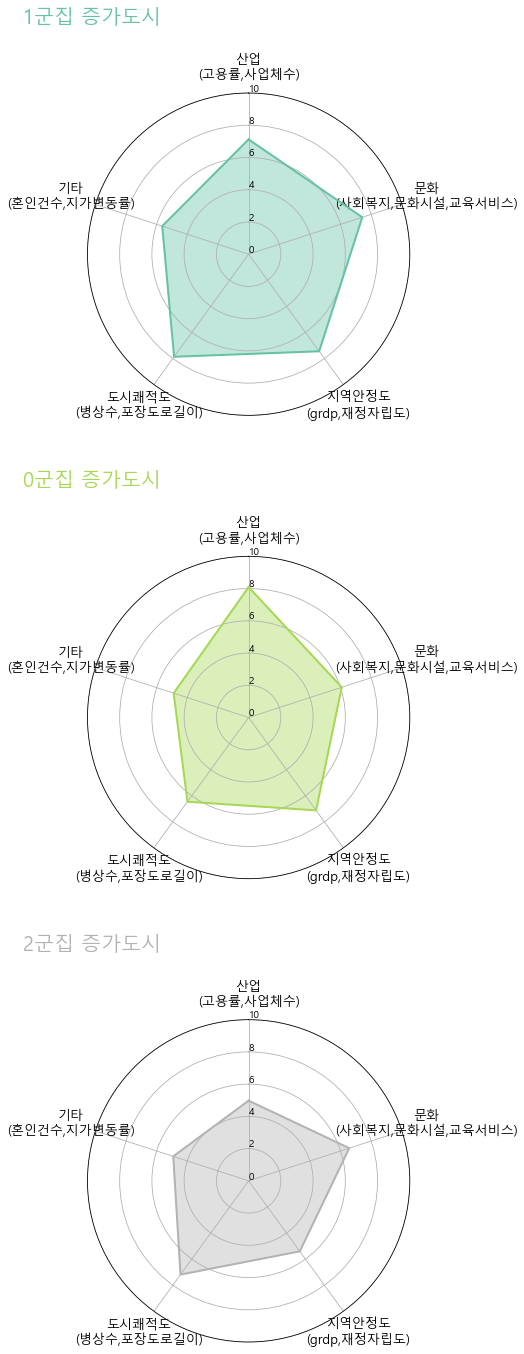

In [282]:
## 따로 그리기
labels = ddd.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(ddd.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in ddd.iterrows():
    color = my_palette(i)
    data = ddd.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,1,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.군집, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

No handles with labels found to put in legend.


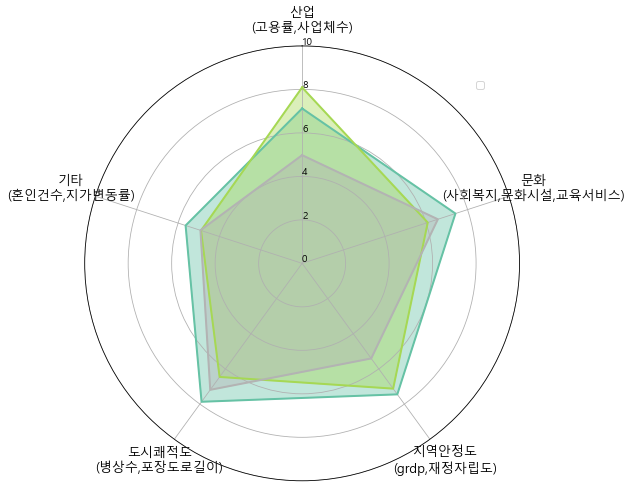

In [283]:
## 따로 그리기
labels = ddd.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(ddd.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in ddd.iterrows():
    color = my_palette(i)
    data = ddd.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    
 

plt.legend(loc = (0.9,0.9))
plt.show()

In [284]:
df[df['군집'] == 0]['행정구역(시군구)별'].unique()

array(['고양시', '김해시', '남양주시', '부천시', '성남시', '수원시', '안산시', '용인시', '전주시',
       '창원시', '천안시', '청주시', '파주시', '포항시', '화성시'], dtype=object)

In [285]:
df0 = df[df['군집'] == 0]
df1 = df[df['군집'] == 1]
df2 = df[df['군집'] == 2]

In [286]:
df0.groupby('행정구역(시군구)별').mean().reset_index()

,행정구역(시군구)별,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
0,고양시,230.964286,56.757143,4.980551e+05,15228.428571,33.000000,0.252167,155.714286,179.000000,50.828571,4937.142857,12635.142857,1.872548e+07,0.0
1,김해시,32.035714,59.321429,8.065814e+05,7207.714286,23.857143,0.230429,133.571429,28.857143,40.128571,2798.000000,10174.428571,1.483146e+07,0.0
2,남양주시,193.321429,55.614286,2.989951e+05,7034.142857,25.714286,0.251131,55.857143,133.285714,37.885714,2992.285714,5923.428571,9.180404e+06,0.0
3,부천시,-175.607143,57.942857,5.577484e+05,11763.714286,25.714286,0.236976,141.714286,133.714286,43.200000,4736.000000,11972.285714,1.651298e+07,0.0
4,성남시,-27.869048,58.842857,6.508313e+05,22146.857143,21.428571,0.268476,421.285714,73.285714,63.571429,5891.285714,9432.714286,3.608753e+07,0.0
5,수원시,330.726190,58.785714,9.281649e+05,22973.571429,35.142857,0.191583,276.142857,96.428571,58.585714,7411.857143,11024.428571,3.160470e+07,0.0
6,안산시,-240.559524,59.264286,8.763386e+05,10292.571429,24.714286,0.195786,299.142857,135.714286,55.057143,3980.571429,9495.142857,2.452142e+07,0.0
7,용인시,487.988095,55.685714,3.846706e+05,21423.714286,39.000000,0.196369,244.857143,114.714286,62.014286,4955.428571,8501.285714,3.114633e+07,0.0
8,전주시,-148.273810,55.035714,7.643013e+05,11929.857143,33.714286,0.256298,141.428571,64.142857,31.300000,3193.571429,16583.571429,1.357121e+07,0.0
9,창원시,-389.690476,58.342857,1.659124e+06,15315.142857,35.714286,0.125393,334.285714,81.285714,42.114286,5685.714286,19386.285714,3.733241e+07,0.0


In [287]:
pd.DataFrame(df.groupby('군집').mean().reset_index().iloc[:,2:-1].mean()).transpose()

,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수
0,59.498185,558966.896345,6549.587932,17.287058,0.216057,115.725912,55.605122,38.078624,2230.627438,5243.334981


In [288]:
a = df.groupby('군집').mean().reset_index().drop(columns = '순이동')
a

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,0,58.641176,765799.421569,13205.078431,29.284314,0.218150,218.705882,99.186275,47.767647,4314.421569,10055.598039,2.541300e+07
1,1,59.873145,309871.183746,3760.583039,10.190813,0.210006,84.890459,32.819788,42.997527,1517.749117,2352.448763,1.145638e+07
2,2,59.980233,601230.083721,2683.102326,12.386047,0.220015,43.581395,34.809302,23.470698,859.711628,3321.958140,5.545868e+06


In [289]:
a

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,0,58.641176,765799.421569,13205.078431,29.284314,0.218150,218.705882,99.186275,47.767647,4314.421569,10055.598039,2.541300e+07
1,1,59.873145,309871.183746,3760.583039,10.190813,0.210006,84.890459,32.819788,42.997527,1517.749117,2352.448763,1.145638e+07
2,2,59.980233,601230.083721,2683.102326,12.386047,0.220015,43.581395,34.809302,23.470698,859.711628,3321.958140,5.545868e+06


In [290]:
col = a.columns[1:]

In [291]:
dd = pd.DataFrame()
a['산업\n(고용률,사업체수)'] = (a['고용률'] + a['사업체수'])/2
a['문화\n(사회복지,문화시설,교육서비스)'] = (a['사회복지시설수'] + a['문화기반시설수'] + a['교육서비스 종사자수'])/3
a['지역안정도\n(grdp,재정자립도)'] = (a['당해년가격'] + a['재정자립도'])/2
a['도시쾌적도\n(병상수,포장도로길이)'] = (a['병상수'] + a['포장도로길이'])/2
a['기타\n(혼인건수,지가변동률)'] = (a['혼인건수'] + a['지가변동률(%)'])/2


a

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,0,58.641176,765799.421569,13205.078431,29.284314,0.218150,218.705882,99.186275,47.767647,4314.421569,10055.598039,2.541300e+07,138.673529,4444.516340,1.270652e+07,387927.509804,2157.319859
1,1,59.873145,309871.183746,3760.583039,10.190813,0.210006,84.890459,32.819788,42.997527,1517.749117,2352.448763,1.145638e+07,72.381802,1267.864547,5.728211e+06,156111.816254,758.979561
2,2,59.980233,601230.083721,2683.102326,12.386047,0.220015,43.581395,34.809302,23.470698,859.711628,3321.958140,5.545868e+06,51.780814,910.099225,2.772946e+06,302276.020930,429.965822


In [292]:
a = a.drop(columns = col)

In [293]:
a

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,0,138.673529,4444.516340,1.270652e+07,387927.509804,2157.319859
1,1,72.381802,1267.864547,5.728211e+06,156111.816254,758.979561
2,2,51.780814,910.099225,2.772946e+06,302276.020930,429.965822


In [294]:
ddd=a

In [295]:
ddd

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,0,138.673529,4444.516340,1.270652e+07,387927.509804,2157.319859
1,1,72.381802,1267.864547,5.728211e+06,156111.816254,758.979561
2,2,51.780814,910.099225,2.772946e+06,302276.020930,429.965822


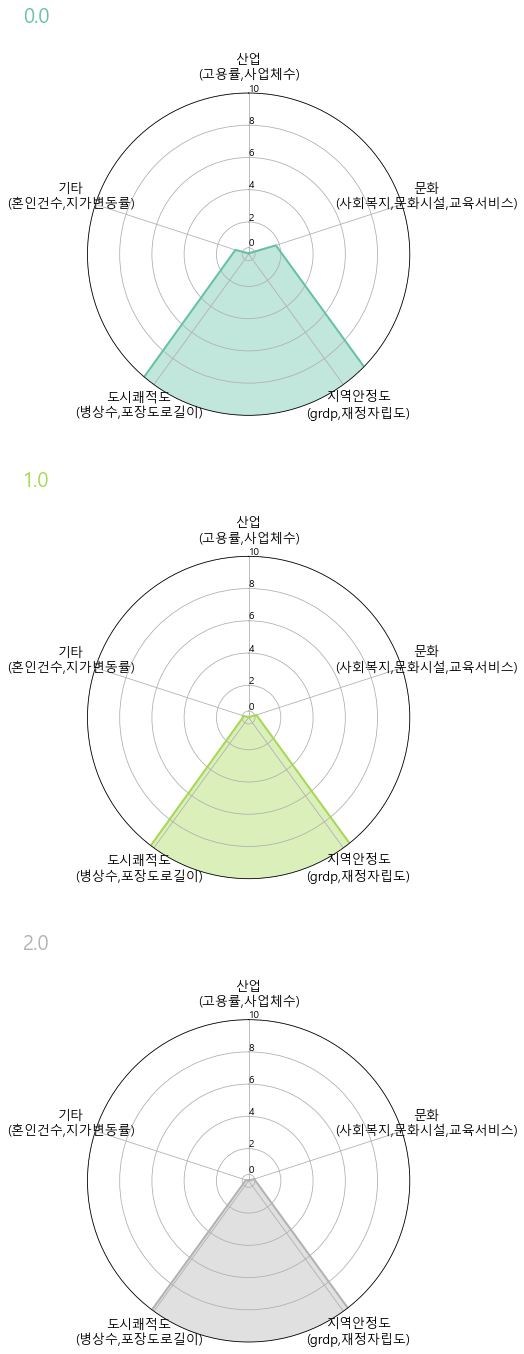

In [296]:
## 따로 그리기
labels = ddd.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(ddd.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in ddd.iterrows():
    color = my_palette(i)
    data = ddd.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,1,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([1000,5000,10000,15000,20000,25000],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,25000)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.군집, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

## 상관계수

In [297]:
ccc_df1 = pd.DataFrame()
for i in ut1['행정구역(시군구)별'].unique():
    a = cc_df[cc_df['행정구역'] == i]
    ccc_df1  = pd.concat([ccc_df1,a])

ccc_df0 = pd.DataFrame()
for i in ut0['행정구역(시군구)별'].unique():
    a = cc_df[cc_df['행정구역'] == i]
    ccc_df0  = pd.concat([ccc_df0,a])
    
ccc_df2 = pd.DataFrame()
for i in ut2['행정구역(시군구)별'].unique():
    a = cc_df[cc_df['행정구역'] == i]
    ccc_df2  = pd.concat([ccc_df2,a])

In [298]:
ccc_df0 = ccc_df0.drop(index = 0)
ccc_df1 = ccc_df1.drop(index = 0)
ccc_df2 = ccc_df2.drop(index = 0)

In [299]:
ccc_df2['상관계수'] = abs(ccc_df2['상관계수'])
ccc_df1['상관계수'] = abs(ccc_df1['상관계수'])
ccc_df0['상관계수'] = abs(ccc_df0['상관계수'])

In [300]:
ccc_df0 = ccc_df0.rename(columns = {'상관계수':'0번 군집'})
ccc_df1 = ccc_df1.rename(columns = {'상관계수':'1번 군집'})
ccc_df2 = ccc_df2.rename(columns = {'상관계수':'2번 군집'})

In [301]:
ccc_df0 = ccc_df0.groupby('변수').mean().transpose()
ccc_df1 = ccc_df1.groupby('변수').mean().transpose()
ccc_df2 = ccc_df2.groupby('변수').mean().transpose()

In [302]:
col = ccc_df0.columns
for a in [ccc_df0,ccc_df1,ccc_df2]:

    a['산업\n(고용률,사업체수)'] = (a['고용률'] + a['사업체수'])/2
    a['문화\n(사회복지,문화시설,교육서비스)'] = (a['사회복지시설수'] + a['문화기반시설수'] + a['교육서비스 종사자수'])/3
    a['지역안정도\n(grdp,재정자립도)'] = (a['당해년가격'] + a['재정자립도'])/2
    a['도시쾌적도\n(병상수,포장도로길이)'] = (a['병상수'] + a['포장도로길이'])/2
    a['기타\n(혼인건수,지가변동률)'] = (a['혼인건수'] + a['지가변동률(%)'])/2
    a = a.drop(columns = col)

In [303]:
ccc_df0 = ccc_df0.drop(columns = col)
ccc_df1 = ccc_df1.drop(columns = col)
ccc_df2 = ccc_df2.drop(columns = col)

In [304]:
ccc_df0

변수,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0번 군집,0.315476,0.277618,0.303757,0.2933,0.320105


In [305]:
cccc = pd.concat([ccc_df0,ccc_df1,ccc_df2])

In [306]:
cccc = cccc.reset_index()

In [307]:
ddd =cccc

In [308]:
ddd = ddd.rename(columns = {'index':'군집'})

In [309]:
ddd

변수,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,0번 군집,0.315476,0.277618,0.303757,0.293300,0.320105
1,1번 군집,0.377780,0.391350,0.364779,0.329273,0.319976
2,2번 군집,0.180033,0.224671,0.175083,0.265130,0.287421


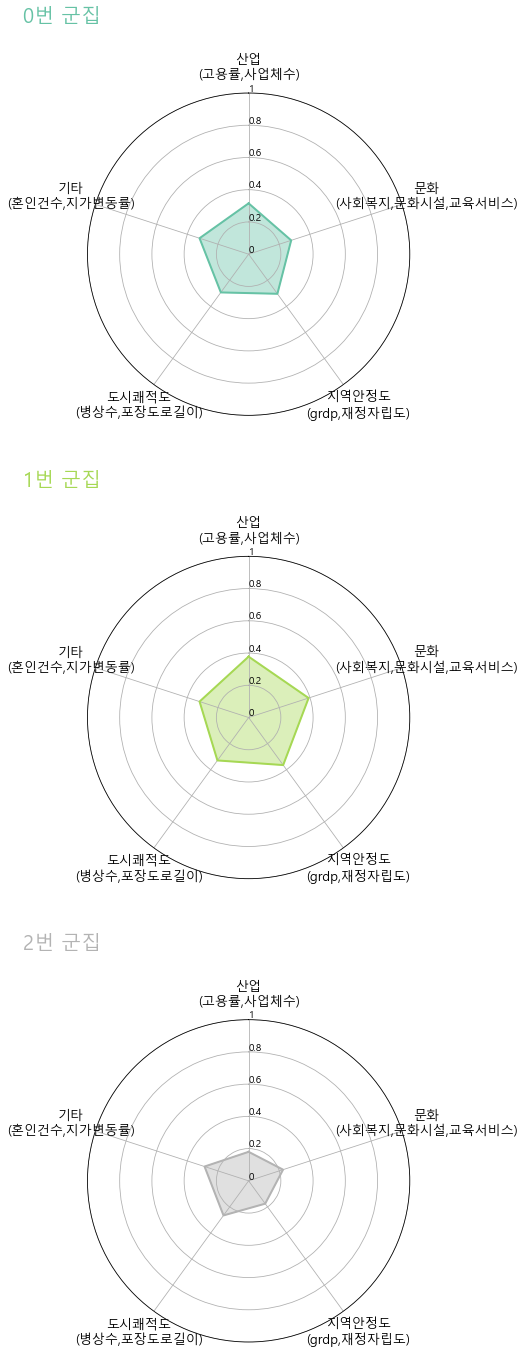

In [310]:
## 따로 그리기
labels = ddd.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(ddd.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in ddd.iterrows():
    color = my_palette(i)
    data = ddd.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,1,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.군집, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [311]:
df

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
0,거제시,2013,01,167,64.1,744378.0,2754.0,12.0,0.179,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
1,거제시,2013,02,78,64.1,744378.0,2754.0,12.0,0.117,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
2,거제시,2013,03,240,64.1,744378.0,2754.0,12.0,0.173,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
3,거제시,2013,04,110,64.1,744378.0,2754.0,12.0,0.304,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
4,거제시,2013,05,253,64.1,744378.0,2754.0,12.0,0.063,254.0,10.0,45.2,2186.0,2206.0,12877406.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5497,화성시,2019,08,1213,66.5,662864.0,14733.0,28.0,0.346,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5498,화성시,2019,09,1240,66.5,662864.0,14733.0,28.0,0.309,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5499,화성시,2019,10,1524,66.5,662864.0,14733.0,28.0,0.505,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0
5500,화성시,2019,11,1059,66.5,662864.0,14733.0,28.0,0.197,321.0,113.0,68.9,4788.0,5286.0,74532143.0,0


### 4번째 방법

In [312]:
dff = df.copy()

In [313]:
scaler = StandardScaler()

for i in dff.iloc[:,4:-1].columns:
    dff[i] = scaler.fit_transform(dff[i].values.reshape(-1,1))

In [314]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in dff.iloc[:,4:-1].columns:
    dff[i] = scaler.fit_transform(dff[i].values.reshape(-1,1))

In [315]:
ccc_df1 = pd.DataFrame()
for i in ut1['행정구역(시군구)별'].unique():
    a = dff[dff['행정구역(시군구)별'] == i]
    ccc_df1  = pd.concat([ccc_df1,a])

ccc_df0 = pd.DataFrame()
for i in ut0['행정구역(시군구)별'].unique():
    a = dff[dff['행정구역(시군구)별'] == i]
    ccc_df0  = pd.concat([ccc_df0,a])
    
ccc_df2 = pd.DataFrame()
for i in ut2['행정구역(시군구)별'].unique():
    a = dff[dff['행정구역(시군구)별'] == i]
    ccc_df2  = pd.concat([ccc_df2,a])

In [316]:
ccc_df0['행정구역(시군구)별'].unique()

array(['고양시', '김해시', '남양주시', '수원시', '용인시', '천안시', '청주시', '파주시', '화성시'],
      dtype=object)

In [317]:
ccc_df0

,행정구역(시군구)별,년도,월,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
312,고양시,2013,01,419,0.341232,0.174502,0.537416,0.625,0.229311,0.277542,0.698565,0.724843,0.669007,0.572069,0.193050,0
313,고양시,2013,02,288,0.341232,0.174502,0.537416,0.625,0.224239,0.277542,0.698565,0.724843,0.669007,0.572069,0.193050,0
314,고양시,2013,03,172,0.341232,0.174502,0.537416,0.625,0.238922,0.277542,0.698565,0.724843,0.669007,0.572069,0.193050,0
315,고양시,2013,04,195,0.341232,0.174502,0.537416,0.625,0.275761,0.277542,0.698565,0.724843,0.669007,0.572069,0.193050,0
316,고양시,2013,05,162,0.341232,0.174502,0.537416,0.625,0.290977,0.277542,0.698565,0.724843,0.669007,0.572069,0.193050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5497,화성시,2019,08,1213,0.800948,0.364680,0.596256,0.600,0.319808,0.673729,0.526316,0.948113,0.585381,0.257753,0.958418,0
5498,화성시,2019,09,1240,0.800948,0.364680,0.596256,0.600,0.309931,0.673729,0.526316,0.948113,0.585381,0.257753,0.958418,0
5499,화성시,2019,10,1524,0.800948,0.364680,0.596256,0.600,0.362253,0.673729,0.526316,0.948113,0.585381,0.257753,0.958418,0
5500,화성시,2019,11,1059,0.800948,0.364680,0.596256,0.600,0.280032,0.673729,0.526316,0.948113,0.585381,0.257753,0.958418,0


In [318]:
aa = ccc_df0.groupby('군집').mean().reset_index().drop(columns = '순이동')
bb = ccc_df1.groupby('군집').mean().reset_index().drop(columns = '순이동')
cc = ccc_df2.groupby('군집').mean().reset_index().drop(columns = '순이동')

In [319]:
aa

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,0,0.443672,0.370878,0.525321,0.670902,0.286155,0.407231,0.492588,0.640118,0.517388,0.404633,0.329058


In [320]:
bb

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,1,0.564008,0.179874,0.136081,0.167919,0.283421,0.18633,0.145117,0.567101,0.18262,0.119178,0.15621


In [321]:
cc

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,2,0.43121,0.25928,0.19791,0.175,0.29877,0.123068,0.232198,0.365289,0.159147,0.225774,0.077382


In [322]:
aaa = pd.concat([aa,bb,cc])

In [323]:
aaa = aaa.reset_index().drop(columns = 'index')

In [324]:
# aaa.iloc[:,1:] = aaa.iloc[:,1:]+1

In [325]:
aaa

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,0,0.443672,0.370878,0.525321,0.670902,0.286155,0.407231,0.492588,0.640118,0.517388,0.404633,0.329058
1,1,0.564008,0.179874,0.136081,0.167919,0.283421,0.186330,0.145117,0.567101,0.182620,0.119178,0.156210
2,2,0.431210,0.259280,0.197910,0.175000,0.298770,0.123068,0.232198,0.365289,0.159147,0.225774,0.077382


In [326]:
col = aaa.columns[1:]
aaa['산업\n(고용률,사업체수)'] = (aaa['고용률'] + aaa['사업체수'])/2
aaa['문화\n(사회복지,문화시설,교육서비스)'] = (aaa['사회복지시설수'] + aaa['문화기반시설수'] + aaa['교육서비스 종사자수'])/3
aaa['지역안정도\n(grdp,재정자립도)'] = (aaa['당해년가격'] + aaa['재정자립도'])/2
aaa['도시쾌적도\n(병상수,포장도로길이)'] = (aaa['병상수'] + aaa['포장도로길이'])/2
aaa['기타\n(혼인건수,지가변동률)'] = (aaa['혼인건수'] + aaa['지가변동률(%)'])/2
aaa = aaa.drop(columns = col)

In [327]:
aaa['군집'] = ['0번 군집', '1번 군집', '2번 군집']

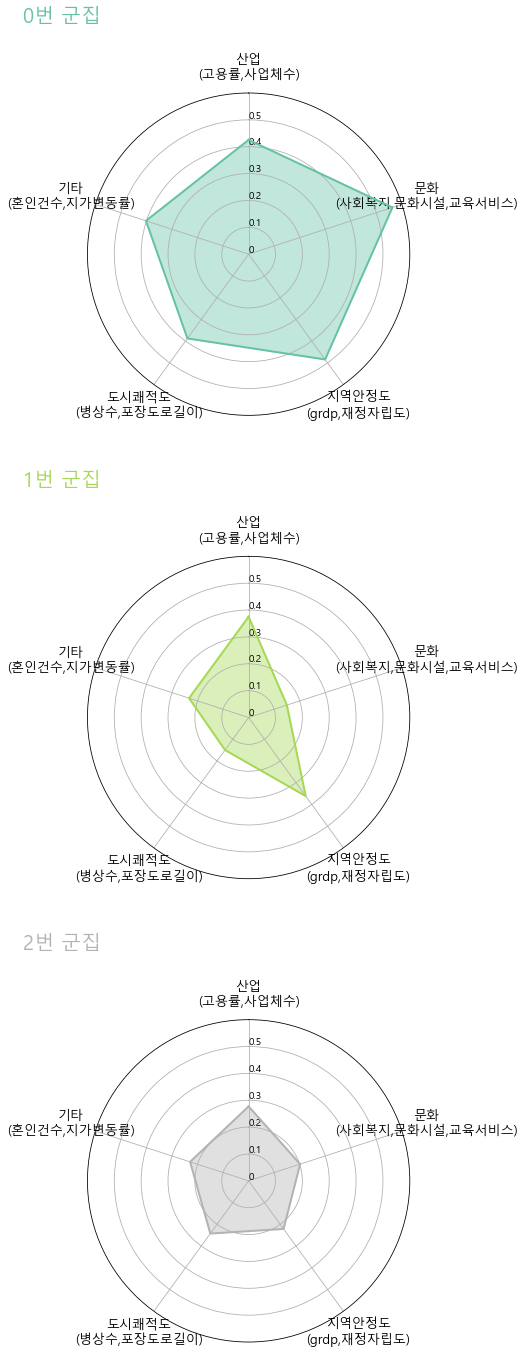

In [328]:
## 따로 그리기
labels = aaa.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(aaa.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in aaa.iterrows():
    color = my_palette(i)
    data = aaa.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,1,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5],['0','0.1','0.2','0.3','0.4','0.5'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,0.6)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.군집, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [329]:
df_cw = dff[dff['행정구역(시군구)별'] == '창원시']
df_cw['군집'] = '창원시'

In [330]:
df_cw = df_cw.groupby('군집').mean().reset_index().drop(columns = '순이동')

In [331]:
df_cw

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,창원시,0.414353,0.962342,0.620311,0.792857,0.260916,0.701877,0.374573,0.526954,0.697933,0.945304,0.475312


In [332]:
col = df_cw.columns[1:]
df_cw['산업\n(고용률,사업체수)'] = (df_cw['고용률'] + df_cw['사업체수'])/2
df_cw['문화\n(사회복지,문화시설,교육서비스)'] = (df_cw['사회복지시설수'] + df_cw['문화기반시설수'] + df_cw['교육서비스 종사자수'])/3
df_cw['지역안정도\n(grdp,재정자립도)'] = (df_cw['당해년가격'] + df_cw['재정자립도'])/2
df_cw['도시쾌적도\n(병상수,포장도로길이)'] = (df_cw['병상수'] + df_cw['포장도로길이'])/2
df_cw['기타\n(혼인건수,지가변동률)'] = (df_cw['혼인건수'] + df_cw['지가변동률(%)'])/2
df_cw = df_cw.drop(columns = col)

In [333]:
df_cw = pd.concat([aaa,df_cw])

In [334]:
df_cw = df_cw.loc[0]

In [335]:
aaa = df_cw

In [336]:
aaa = aaa.reset_index().drop(columns = 'index')

In [337]:
aaa

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,0번 군집,0.425451,0.562937,0.484588,0.387755,0.401772
1,창원시,0.558115,0.595914,0.501133,0.953823,0.479425


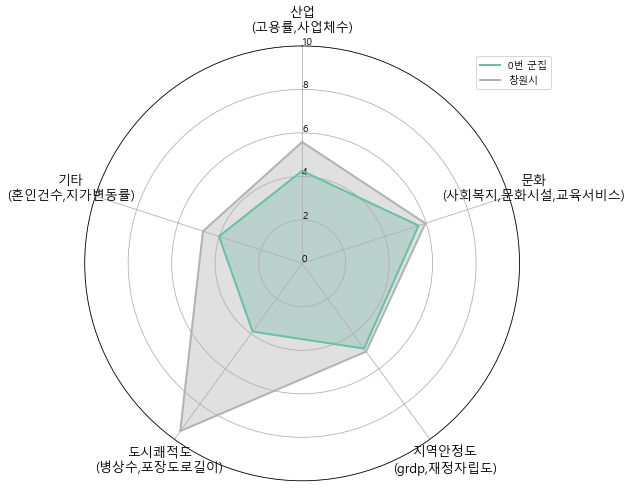

In [338]:
## 따로 그리기
labels = aaa.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(aaa.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in aaa.iterrows():
    color = my_palette(i)
    data = aaa.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    
 

plt.legend(aaa['군집'],loc = (0.9,0.9))
plt.show()

## 변화율로 그려보기

In [339]:
fdd = fd[fd['년도'] != '2013'].reset_index().drop(columns = 'index')

In [340]:
df['군집'].unique()

array([1, 2, 0], dtype=int64)

In [341]:
for i in df['군집'].unique():
    if i == 0:
        cl0 = df[df['군집'] == i]['행정구역(시군구)별'].unique()
    elif i == 1:
        cl1 = df[df['군집'] == i]['행정구역(시군구)별'].unique()
    else:
        cl2 = df[df['군집'] == i]['행정구역(시군구)별'].unique()

In [342]:
cl0

array(['고양시', '김해시', '남양주시', '부천시', '성남시', '수원시', '안산시', '용인시', '전주시',
       '창원시', '천안시', '청주시', '파주시', '포항시', '화성시'], dtype=object)

In [343]:
fdd['군집'] = 0
for i in range(len(fdd)):
    if fdd['행정구역(시군구)별'][i] in cl0:
        fdd['군집'][i] = 0
        
    elif fdd['행정구역(시군구)별'][i] in cl1:
        fdd['군집'][i] = 1
    
    else:
        fdd['군집'][i] = 2

In [344]:
fdd

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
0,거제시,2014,232.583333,0.463320,-48.802092,3.537653,0.000000,26.847458,11.805556,9.090909,-2.031603,-4.343675,2.904930,-8.818487,1
1,거제시,2015,252.166667,2.190332,0.176600,5.463576,7.692308,-77.496992,-8.270677,8.333333,-6.746988,8.154318,2.489270,-7.611655,1
2,거제시,2016,-48.333333,-2.397525,4.087917,-3.177315,0.000000,351.057402,-11.764706,0.000000,0.000000,-11.813725,3.479702,1.326238,1
3,거제시,2017,-185.750000,-5.293160,2.578135,5.489183,7.142857,35.852713,-20.202020,0.000000,-9.498681,-29.359543,-1.428571,-9.594871,1
4,거제시,2018,-179.583333,-4.333050,1.258939,2.395210,0.000000,66.395311,-29.411765,42.857143,-9.855072,-22.723735,0.251467,-13.638822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,화성시,2015,1372.583333,-0.324149,1.589432,4.295215,4.545455,11.035073,8.741259,-5.333333,0.325203,14.469697,5.411765,17.016715,0
387,화성시,2016,1155.000000,1.358913,0.884447,4.152280,0.000000,33.992095,1.038062,21.052632,4.205607,6.757711,6.556066,10.172139,0
388,화성시,2017,1392.833333,1.573564,-1.468885,10.207489,8.333333,29.512438,1.700680,2.061856,4.606241,2.658721,-5.637669,22.259223,0
389,화성시,2018,1714.333333,1.396431,-1.676317,7.771831,0.000000,-20.100382,0.000000,2.020202,-4.828660,11.554835,5.882353,12.412390,0


In [345]:
ccc_df1 = pd.DataFrame()
for i in ut1['행정구역(시군구)별'].unique():
    a = fdd[fdd['행정구역(시군구)별'] == i]
    ccc_df1  = pd.concat([ccc_df1,a])

ccc_df0 = pd.DataFrame()
for i in ut0['행정구역(시군구)별'].unique():
    a = fdd[fdd['행정구역(시군구)별'] == i]
    ccc_df0  = pd.concat([ccc_df0,a])
    
ccc_df2 = pd.DataFrame()
for i in ut2['행정구역(시군구)별'].unique():
    a = fdd[fdd['행정구역(시군구)별'] == i]
    ccc_df2  = pd.concat([ccc_df2,a])

In [346]:
ccc_df0

,행정구역(시군구)별,년도,순이동,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격,군집
22,고양시,2014,284.916667,-0.525855,0.000000,2.733319,9.375000,53.090004,3.597122,1.324503,-1.672862,-2.441315,7.476341,5.321357,0
23,고양시,2015,411.416667,-1.242236,1.030187,9.623514,-3.225806,-7.585899,6.081081,6.211180,-10.245902,0.671517,0.922019,3.574073,0
24,고양시,2016,215.500000,1.053556,0.347336,-0.271541,11.428571,9.673519,4.516129,14.814815,2.788845,-8.698297,1.523546,7.902854,0
25,고양시,2017,-40.916667,-2.520252,32.675645,6.588716,0.000000,34.033502,5.487805,2.072539,6.691450,-4.270613,-0.572667,7.818992,0
26,고양시,2018,-105.333333,2.114537,33.839678,2.444324,-2.941176,26.254902,8.888889,2.525253,-10.020450,-9.566829,-1.572080,6.579318,0
27,고양시,2019,402.250000,0.959860,-0.108720,0.396754,2.857143,-25.708652,-5.882353,6.603774,-7.236842,2.770270,-1.000318,0.738017,0
92,김해시,2014,127.083333,3.119730,26.474006,1.037018,0.000000,22.501046,1.550388,6.666667,4.347826,-6.308037,9.679122,3.721383,0
93,김해시,2015,-45.583333,-0.850340,-30.873637,-8.072067,0.000000,17.778542,-4.032258,-3.448276,-0.256410,-7.652534,2.870617,12.207119,0
94,김해시,2016,-66.083333,2.000000,0.092632,-4.259725,0.000000,13.168110,8.148148,-11.538462,5.569007,-5.490909,4.950302,1.080722,0
95,김해시,2017,-14.000000,0.497512,2.115770,6.084178,8.695652,23.293633,6.250000,0.000000,0.721154,-6.671839,7.666007,2.882728,0


In [347]:
fdd['병상수'] = fdd['병상수'].replace(-np.inf,0)
aaa = fdd.groupby('군집').mean().reset_index().drop(columns = '순이동')

In [348]:
aaa

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,0,0.496411,2.724947,2.326325,4.457914,6.197087,2.437171,5.641188,-0.845888,-4.585044,2.696351,4.511267
1,1,0.534597,1.024979,2.992733,2.860639,12.126268,2.178589,5.577280,-0.287691,-5.237810,-12.218028,5.440370
2,2,0.342154,1.883297,1.240369,3.237119,15.925563,1.908043,3.496581,0.096946,-5.579571,1.528476,4.036181


In [349]:
aa = ccc_df0.groupby('군집').mean().reset_index().drop(columns = '순이동')
bb = ccc_df1.groupby('군집').mean().reset_index().drop(columns = '순이동')
cc = ccc_df2.groupby('군집').mean().reset_index().drop(columns = '순이동')

In [350]:
aaa = pd.concat([aa,bb,cc])
aaa = aaa.reset_index().drop(columns = 'index')

In [351]:
aaa

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,0,0.383302,2.128762,2.793376,4.497209,-4.411603,2.813320,6.502974,-0.353851,-2.901475,3.023865,5.007393
1,1,0.551562,1.038103,3.794182,3.315637,9.010767,3.203880,6.498332,-0.414918,-3.677007,2.913155,5.419743
2,2,0.523162,1.041160,3.024570,4.555234,19.941159,3.295749,7.585368,0.390032,-1.507798,2.380057,5.130994


In [352]:
col = aaa.columns[1:]
aaa['산업\n(고용률,사업체수)'] = (aaa['고용률'] + aaa['사업체수'])/2
aaa['문화\n(사회복지,문화시설,교육서비스)'] = (aaa['사회복지시설수'] + aaa['문화기반시설수'] + aaa['교육서비스 종사자수'])/3
aaa['지역안정도\n(grdp,재정자립도)'] = (aaa['당해년가격'] + aaa['재정자립도'])/2
aaa['도시쾌적도\n(병상수,포장도로길이)'] = (aaa['병상수'] + aaa['포장도로길이'])/2
aaa['기타\n(혼인건수,지가변동률)'] = (aaa['혼인건수'] + aaa['지가변동률(%)'])/2
#aaa['기타(지가변동률)'] = aaa['지가변동률(%)']
aaa = aaa.drop(columns = col)

In [353]:
aaa

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,0,1.598311,4.597853,2.326771,2.576313,-3.656539
1,1,1.877721,4.536050,2.502412,1.975629,2.666880
2,2,1.909456,5.055057,2.760513,1.710609,9.216680


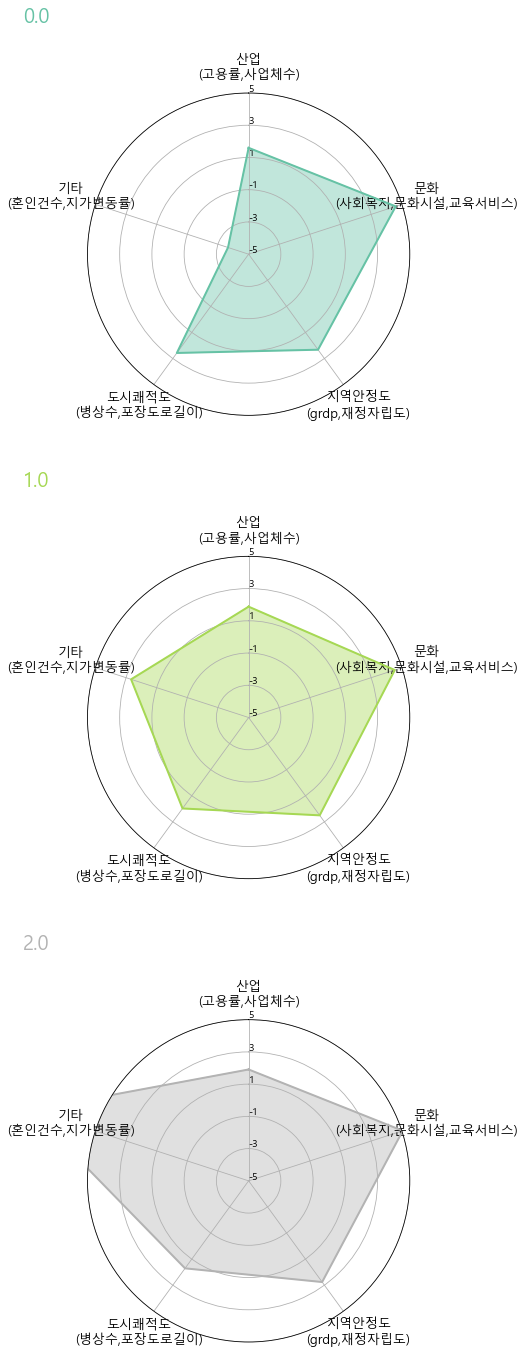

In [354]:
## 따로 그리기
labels = aaa.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(aaa.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in aaa.iterrows():
    color = my_palette(i)
    data = aaa.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,1,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([-5,-3,-1,1,3,5],['-5','-3','-1','1','3','5'], fontsize=10) ## y축 눈금 설정
    plt.ylim(-5,5)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.군집, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [397]:
fdd_cw = fdd[fdd['행정구역(시군구)별'] == '통영시']

In [398]:
fdd_cw = fdd_cw.groupby('군집').mean().reset_index().drop(columns = '순이동')

In [399]:
fdd_cw['군집'] = '사천시'

In [400]:
fdd_cw

,군집,고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
0,사천시,-0.698107,7.34121,2.028885,2.472527,59.724752,-6.629274,7.606838,-3.482643,-11.713466,1.964113,-4.805724


In [401]:
col = fdd_cw.columns[1:]
fdd_cw['산업\n(고용률,사업체수)'] = (fdd_cw['고용률'] + fdd_cw['사업체수'])/2
fdd_cw['문화\n(사회복지,문화시설,교육서비스)'] = (fdd_cw['사회복지시설수'] + fdd_cw['문화기반시설수'] + fdd_cw['교육서비스 종사자수'])/3
fdd_cw['지역안정도\n(grdp,재정자립도)'] = (fdd_cw['당해년가격'] + fdd_cw['재정자립도'])/2
fdd_cw['도시쾌적도\n(병상수,포장도로길이)'] = (fdd_cw['병상수'] + fdd_cw['포장도로길이'])/2
fdd_cw['기타\n(혼인건수,지가변동률)'] = (fdd_cw['혼인건수'] + fdd_cw['지가변동률(%)'])/2
#fdd_cw['기타(지가변동률)'] = fdd_cw['지가변동률(%)']
fdd_cw = fdd_cw.drop(columns = col)

In [402]:
fdd_cw

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,사천시,-3.66369,4.036083,-4.144184,4.652662,24.005643


In [403]:
fdd_cw = pd.concat([aaa,fdd_cw])

In [404]:
fdd_cw

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,2번 군집,1.598311,4.597853,2.326771,2.576313,-3.656539
1,1,1.877721,4.536050,2.502412,1.975629,2.666880
2,2,1.909456,5.055057,2.760513,1.710609,9.216680
0,사천시,-3.663690,4.036083,-4.144184,4.652662,24.005643


In [405]:
#0번 군집
#fdd_cw = fdd_cw.loc[0]

#2번군집
fdd_cw = fdd_cw.iloc[2:]

In [406]:
fdd_cw = fdd_cw.reset_index().drop(columns = 'index')

In [407]:
aaaa = fdd_cw

In [408]:
aaaa

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,2,1.909456,5.055057,2.760513,1.710609,9.216680
1,사천시,-3.663690,4.036083,-4.144184,4.652662,24.005643


In [409]:
aaa['군집'][0] = '2번 군집'

In [410]:
# for i in aaa.columns[1:]:
#     aaa[i] = aaa[i].apply(lambda x: x if x <= 5 else 5)

In [411]:
aaaa

,군집,"산업\n(고용률,사업체수)","문화\n(사회복지,문화시설,교육서비스)","지역안정도\n(grdp,재정자립도)","도시쾌적도\n(병상수,포장도로길이)","기타\n(혼인건수,지가변동률)"
0,2,1.909456,5.055057,2.760513,1.710609,9.216680
1,사천시,-3.663690,4.036083,-4.144184,4.652662,24.005643


In [412]:
zxcv = aaaa

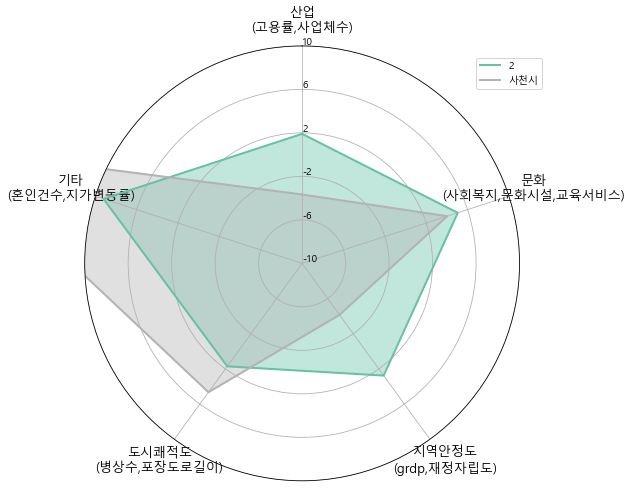

In [413]:
## 따로 그리기
labels = zxcv.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(zxcv.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in fdd_cw.iterrows():
    color = my_palette(i)
    data = zxcv.iloc[i].drop('군집').tolist()
    data += data[:1]
    
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([-10,-6,-2,2,6,10],['-10','-6','-2','2','6','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(-10,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    
 

plt.legend(zxcv['군집'],loc = (0.9,0.9))
plt.show()

# 위작업 진주시껄로 똑같이 분석

In [372]:
df_jj = df[df['행정구역(시군구)별'] == '진주시']

In [373]:
cc_df[cc_df['행정구역'] == '진주시'].sort_values(by = '상관계수', ascending = False)

,변수,상관계수,행정구역
0,순이동,1.000000,진주시
1,고용률,0.236658,진주시
4,문화기반시설수,0.224569,진주시
2,포장도로길이,0.216968,진주시
5,지가변동률(%),0.128195,진주시
11,당해년가격,0.126919,진주시
6,사업체수,0.123998,진주시
8,재정자립도,0.047585,진주시
10,병상수,0.021335,진주시
9,혼인건수,-0.041269,진주시


In [374]:
ut2['행정구역(시군구)별'].unique()

array(['경산시', '나주시', '양산시', '양주시', '의정부시'], dtype=object)

In [375]:
cc_df[cc_df['행정구역'] == '경산시'].sort_values(by = '상관계수', ascending = False)

,변수,상관계수,행정구역
0,순이동,1.000000,경산시
9,혼인건수,0.082470,경산시
3,교육서비스 종사자수,0.002626,경산시
10,병상수,-0.096787,경산시
1,고용률,-0.107862,경산시
5,지가변동률(%),-0.108455,경산시
4,문화기반시설수,-0.109922,경산시
2,포장도로길이,-0.110904,경산시
6,사업체수,-0.133118,경산시
11,당해년가격,-0.142812,경산시


In [376]:
jj = target[target['행정구역(시군구)별'] == '진주시']

In [377]:
jj

,행정구역(시군구)별,년도,월,순이동 (명),고용률,포장도로길이,교육서비스 종사자수,문화기반시설수,지가변동률(%),사업체수,사회복지시설수,재정자립도,혼인건수,병상수,당해년가격
13956,진주시,2013,01,-141,57.7,671553.0,5027.0,14.0,0.109,62.0,26.0,28.4,1787.0,4951.0,6092274.2
13957,진주시,2013,02,-188,57.7,671553.0,5027.0,14.0,0.008,62.0,26.0,28.4,1787.0,4951.0,6092274.2
13958,진주시,2013,03,-155,57.7,671553.0,5027.0,14.0,0.141,62.0,26.0,28.4,1787.0,4951.0,6092274.2
13959,진주시,2013,04,-152,57.7,671553.0,5027.0,14.0,0.183,62.0,26.0,28.4,1787.0,4951.0,6092274.2
13960,진주시,2013,05,-93,57.7,671553.0,5027.0,14.0,0.125,62.0,26.0,28.4,1787.0,4951.0,6092274.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,진주시,2019,08,-6,57.6,796484.0,5811.0,19.0,0.042,80.0,42.0,35.2,1386.0,6424.0,8643663.0
14036,진주시,2019,09,-61,57.6,796484.0,5811.0,19.0,0.091,80.0,42.0,35.2,1386.0,6424.0,8643663.0
14037,진주시,2019,10,-22,57.6,796484.0,5811.0,19.0,0.044,80.0,42.0,35.2,1386.0,6424.0,8643663.0
14038,진주시,2019,11,-76,57.6,796484.0,5811.0,19.0,0.031,80.0,42.0,35.2,1386.0,6424.0,8643663.0


In [378]:
ut2['행정구역(시군구)별'].unique()

array(['경산시', '나주시', '양산시', '양주시', '의정부시'], dtype=object)

In [379]:
jj = target[target['행정구역(시군구)별'] == '진주시']
for i in jj['연령별'].unique():
    print('-'*25, '진주시',i, '-'*25)
    print(jj[jj['연령별'] == i])
    print('총전입 합계:',jj[jj['연령별'] == i]['총전입 (명)'].sum())
    print('총전출 합계:',jj[jj['연령별'] == i]['총전출 (명)'].sum())
    print('총전입 합계:',jj[jj['연령별'] == i]['순이동 (명)'].sum())

KeyError: '연령별'